# About Dataset
### Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.


# Column Information
## People

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

### Products

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

### Promotion

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month

### Target

Need to perform clustering to summarize customer segments.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv('C:\\Users\\Hp\Downloads\\marketing_campaign.csv',delimiter='\t')

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.shape

(2240, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [8]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<Figure size 2400x1600 with 0 Axes>

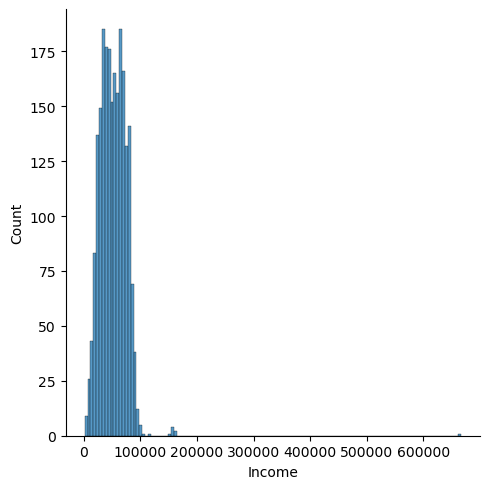

In [9]:
plt.figure(figsize=(12,8),dpi=200)
sns.displot(data=df['Income']);

In [10]:
df['Income']=df['Income'].fillna(df['Income'].median())

In [11]:
df['Income'].isna().sum()

0

In [12]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [13]:
df[['Z_CostContact','Z_Revenue']].value_counts()

Z_CostContact  Z_Revenue
3              11           2240
dtype: int64

In [14]:
df=df.drop(['Z_CostContact','Z_Revenue'],axis=1)

In [15]:
df.shape

(2240, 27)

In [16]:
from datetime import datetime

In [17]:
help(datetime)

Help on class datetime in module datetime:

class datetime(date)
 |  datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])
 |  
 |  The year, month and day arguments are required. tzinfo may be None, or an
 |  instance of a tzinfo subclass. The remaining arguments may be ints.
 |  
 |  Method resolution order:
 |      datetime
 |      date
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __le__(self, value, /)
 |      Return self<=value.
 |  
 |  __lt__(self, value, /)
 |      Return self<value.
 |  
 |  __ne__(self, value, /)
 |      Return self!=value.
 |  
 |  __radd__(self, value

In [18]:
df['Year_Birth'].value_counts()

1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64

In [19]:
df['Year_Birth']=pd.to_datetime(df['Year_Birth'],format='%Y')

In [20]:
df['Year_Birth']=df['Year_Birth'].dt.year

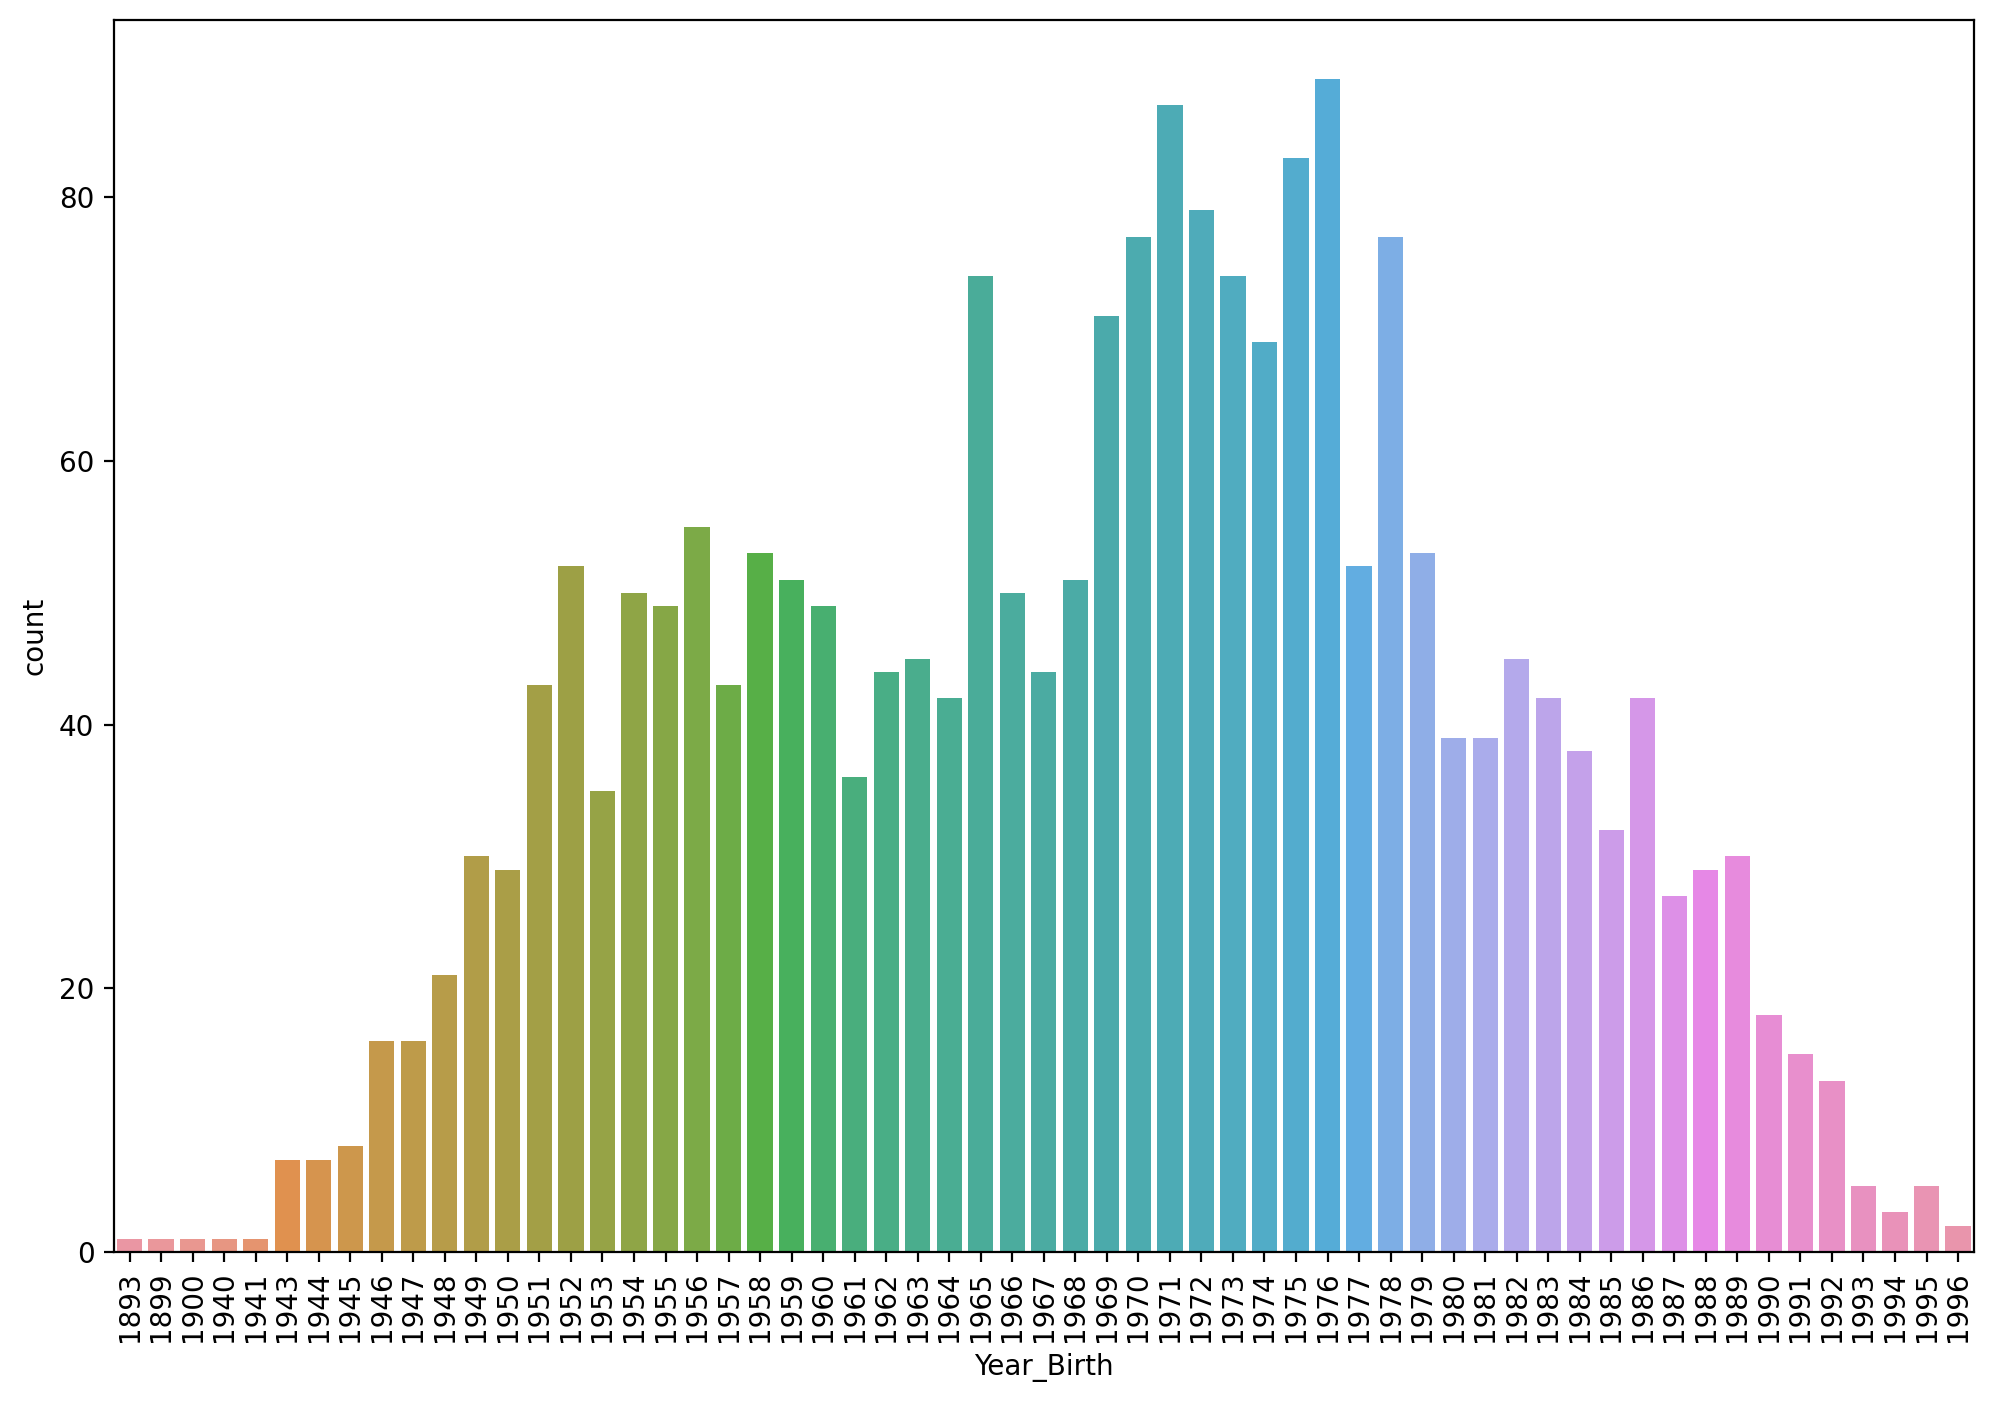

In [21]:
plt.figure(figsize=(12,8),dpi=200)
sns.countplot(df, x='Year_Birth')
plt.xticks(rotation=90);

In [22]:
df['Age']=datetime.now().year-df['Year_Birth']

In [23]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,4,7,0,0,0,0,0,0,1,67
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,5,0,0,0,0,0,0,0,70
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,10,4,0,0,0,0,0,0,0,59
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,4,6,0,0,0,0,0,0,0,40
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,6,5,0,0,0,0,0,0,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,4,5,0,0,0,0,0,0,0,57
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,5,7,0,0,0,1,0,0,0,78
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,13,6,0,1,0,0,0,0,0,43
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,10,3,0,0,0,0,0,0,0,68


<Axes: xlabel='Age'>

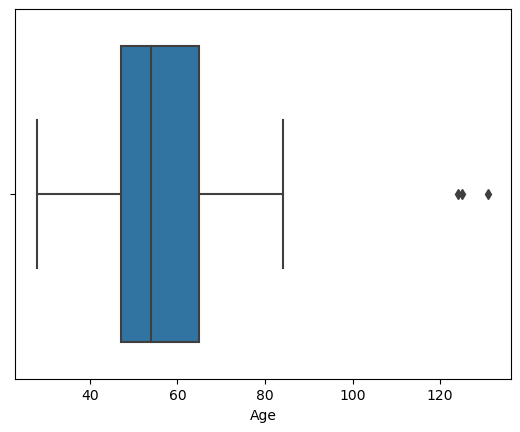

In [24]:
sns.boxplot(df,x='Age')

In [25]:
outliers=df[df['Age']>90]

In [26]:
df=df.drop(outliers.index,axis=0)

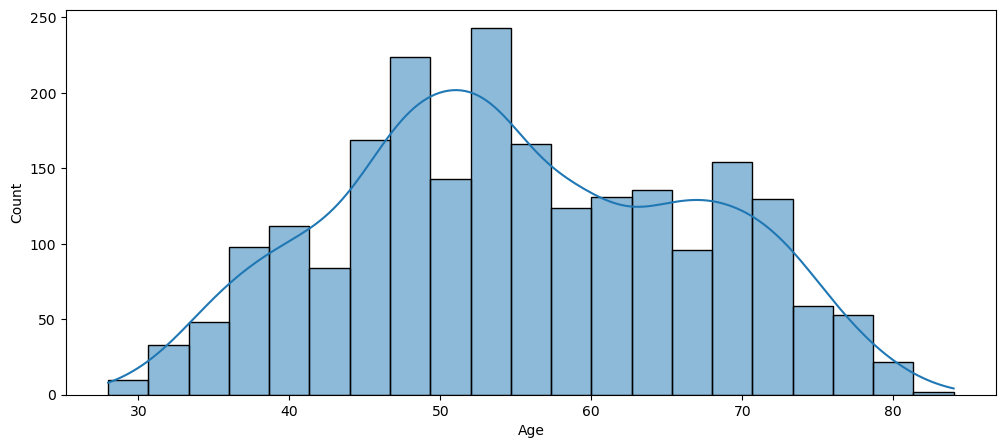

In [27]:
plt.figure(figsize=(12,5))
sns.histplot(df['Age'],kde=True)
plt.show()

In [28]:
def visual (col):
    plt.figure(figsize=(12,8),dpi=200)
    sns.countplot(df, x=col)
    plt.xticks(rotation=90)

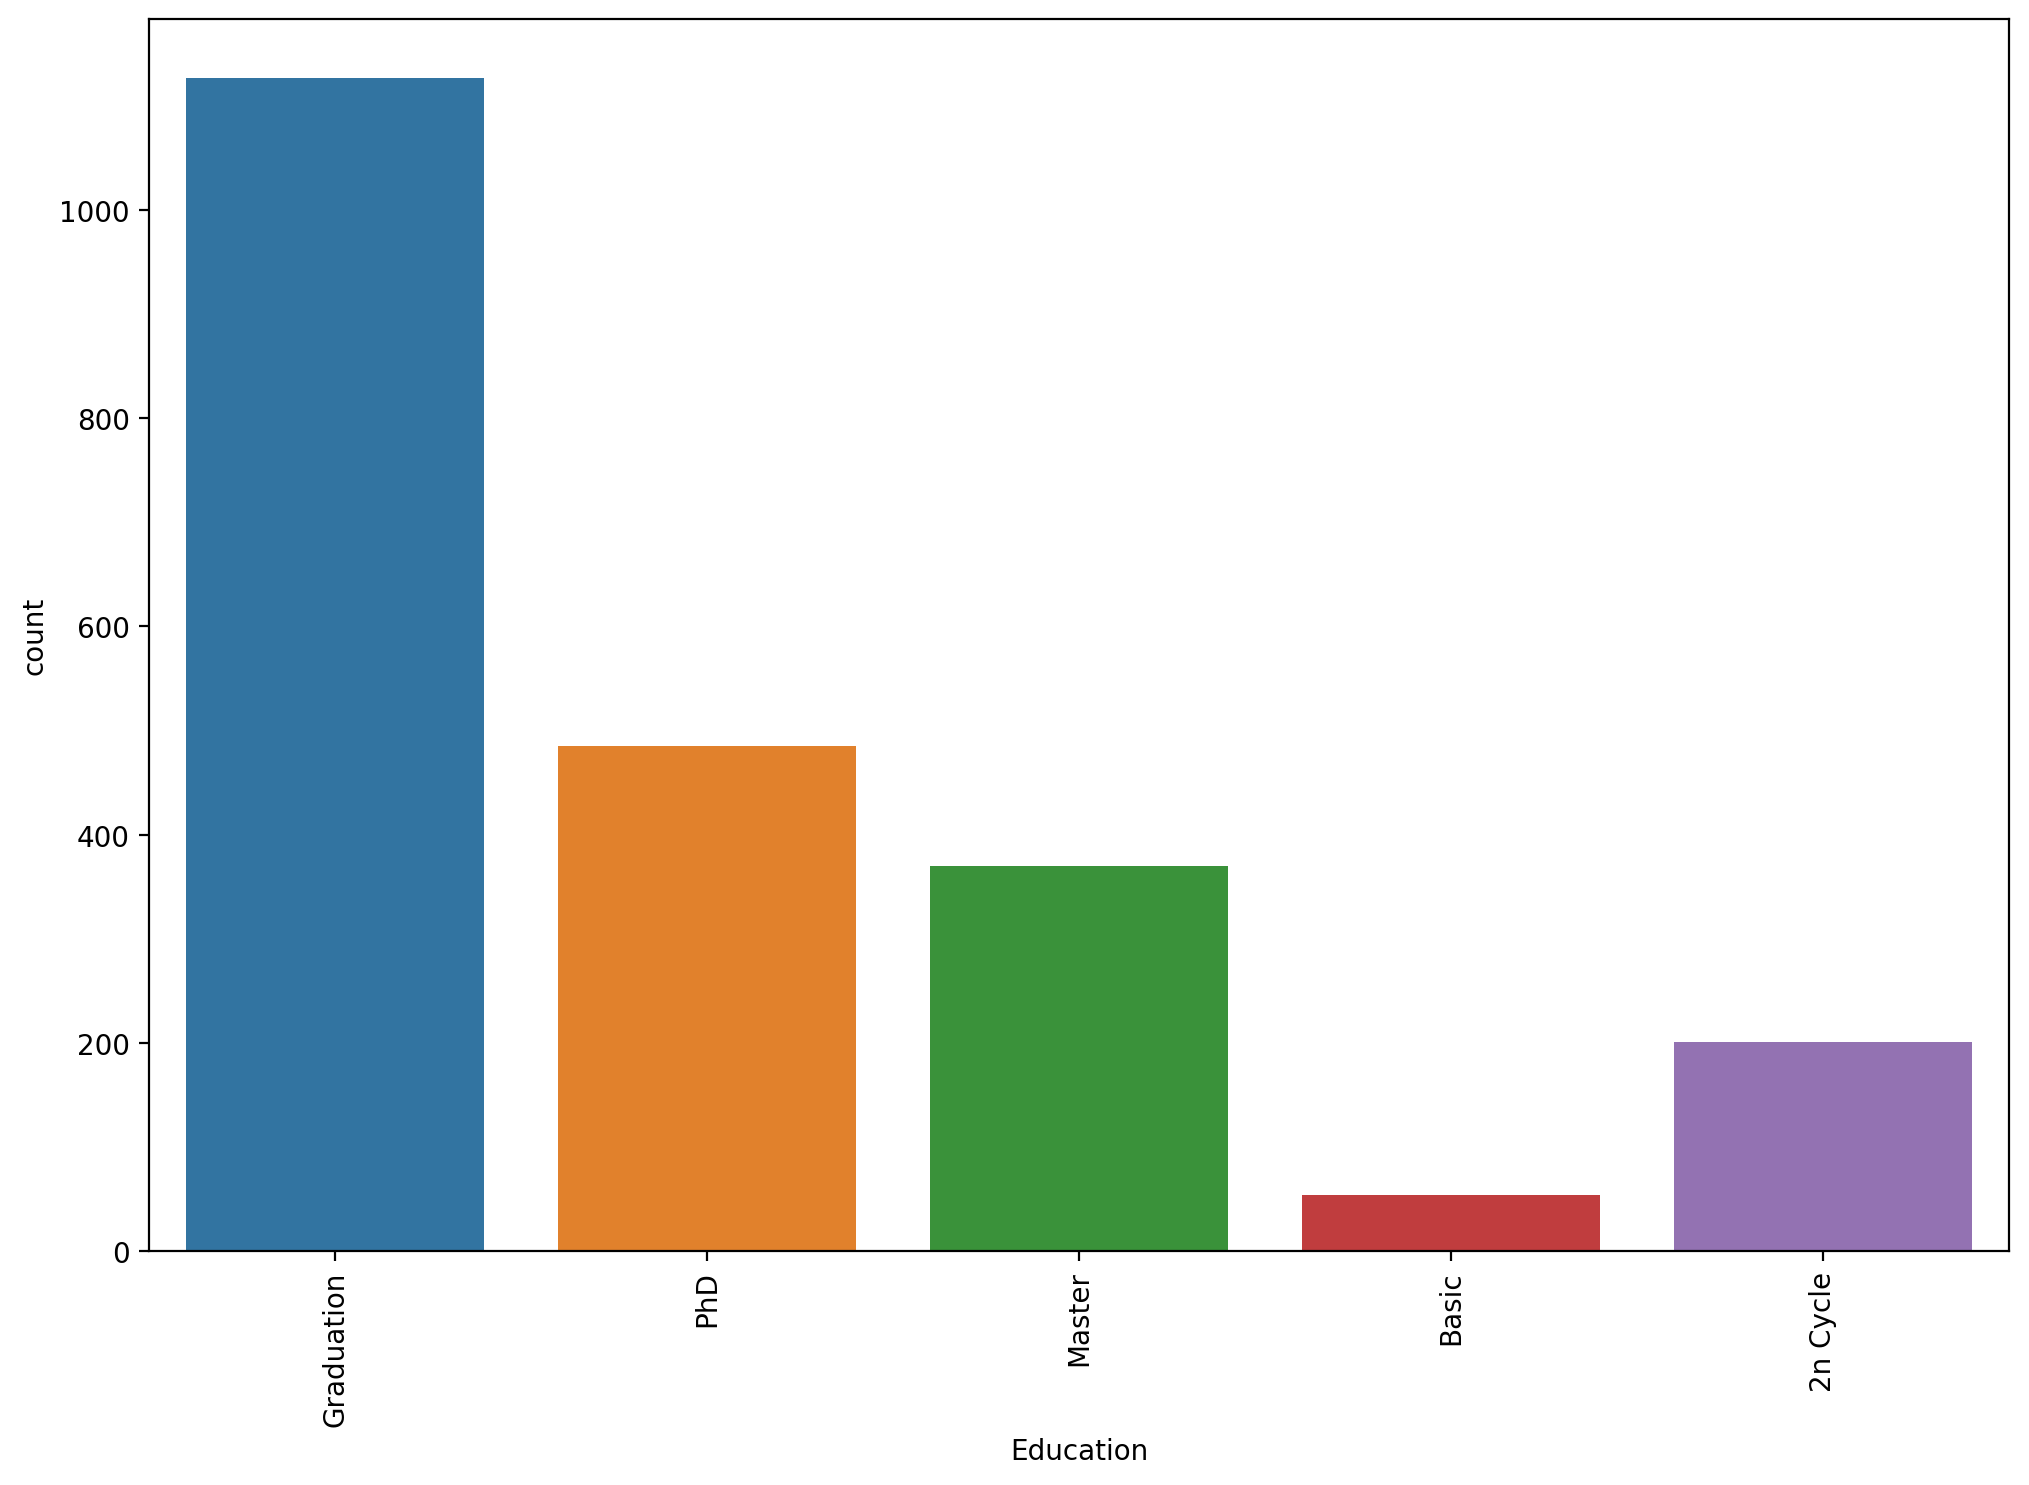

In [29]:
visual('Education')

In [30]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [31]:
df['Education']=df['Education'].replace(['Graduation', 'PhD', 'Master', '2n Cycle'], 'Post Graduate')
df['Education']=df['Education'].replace(['Basic'], 'Under Graduate')

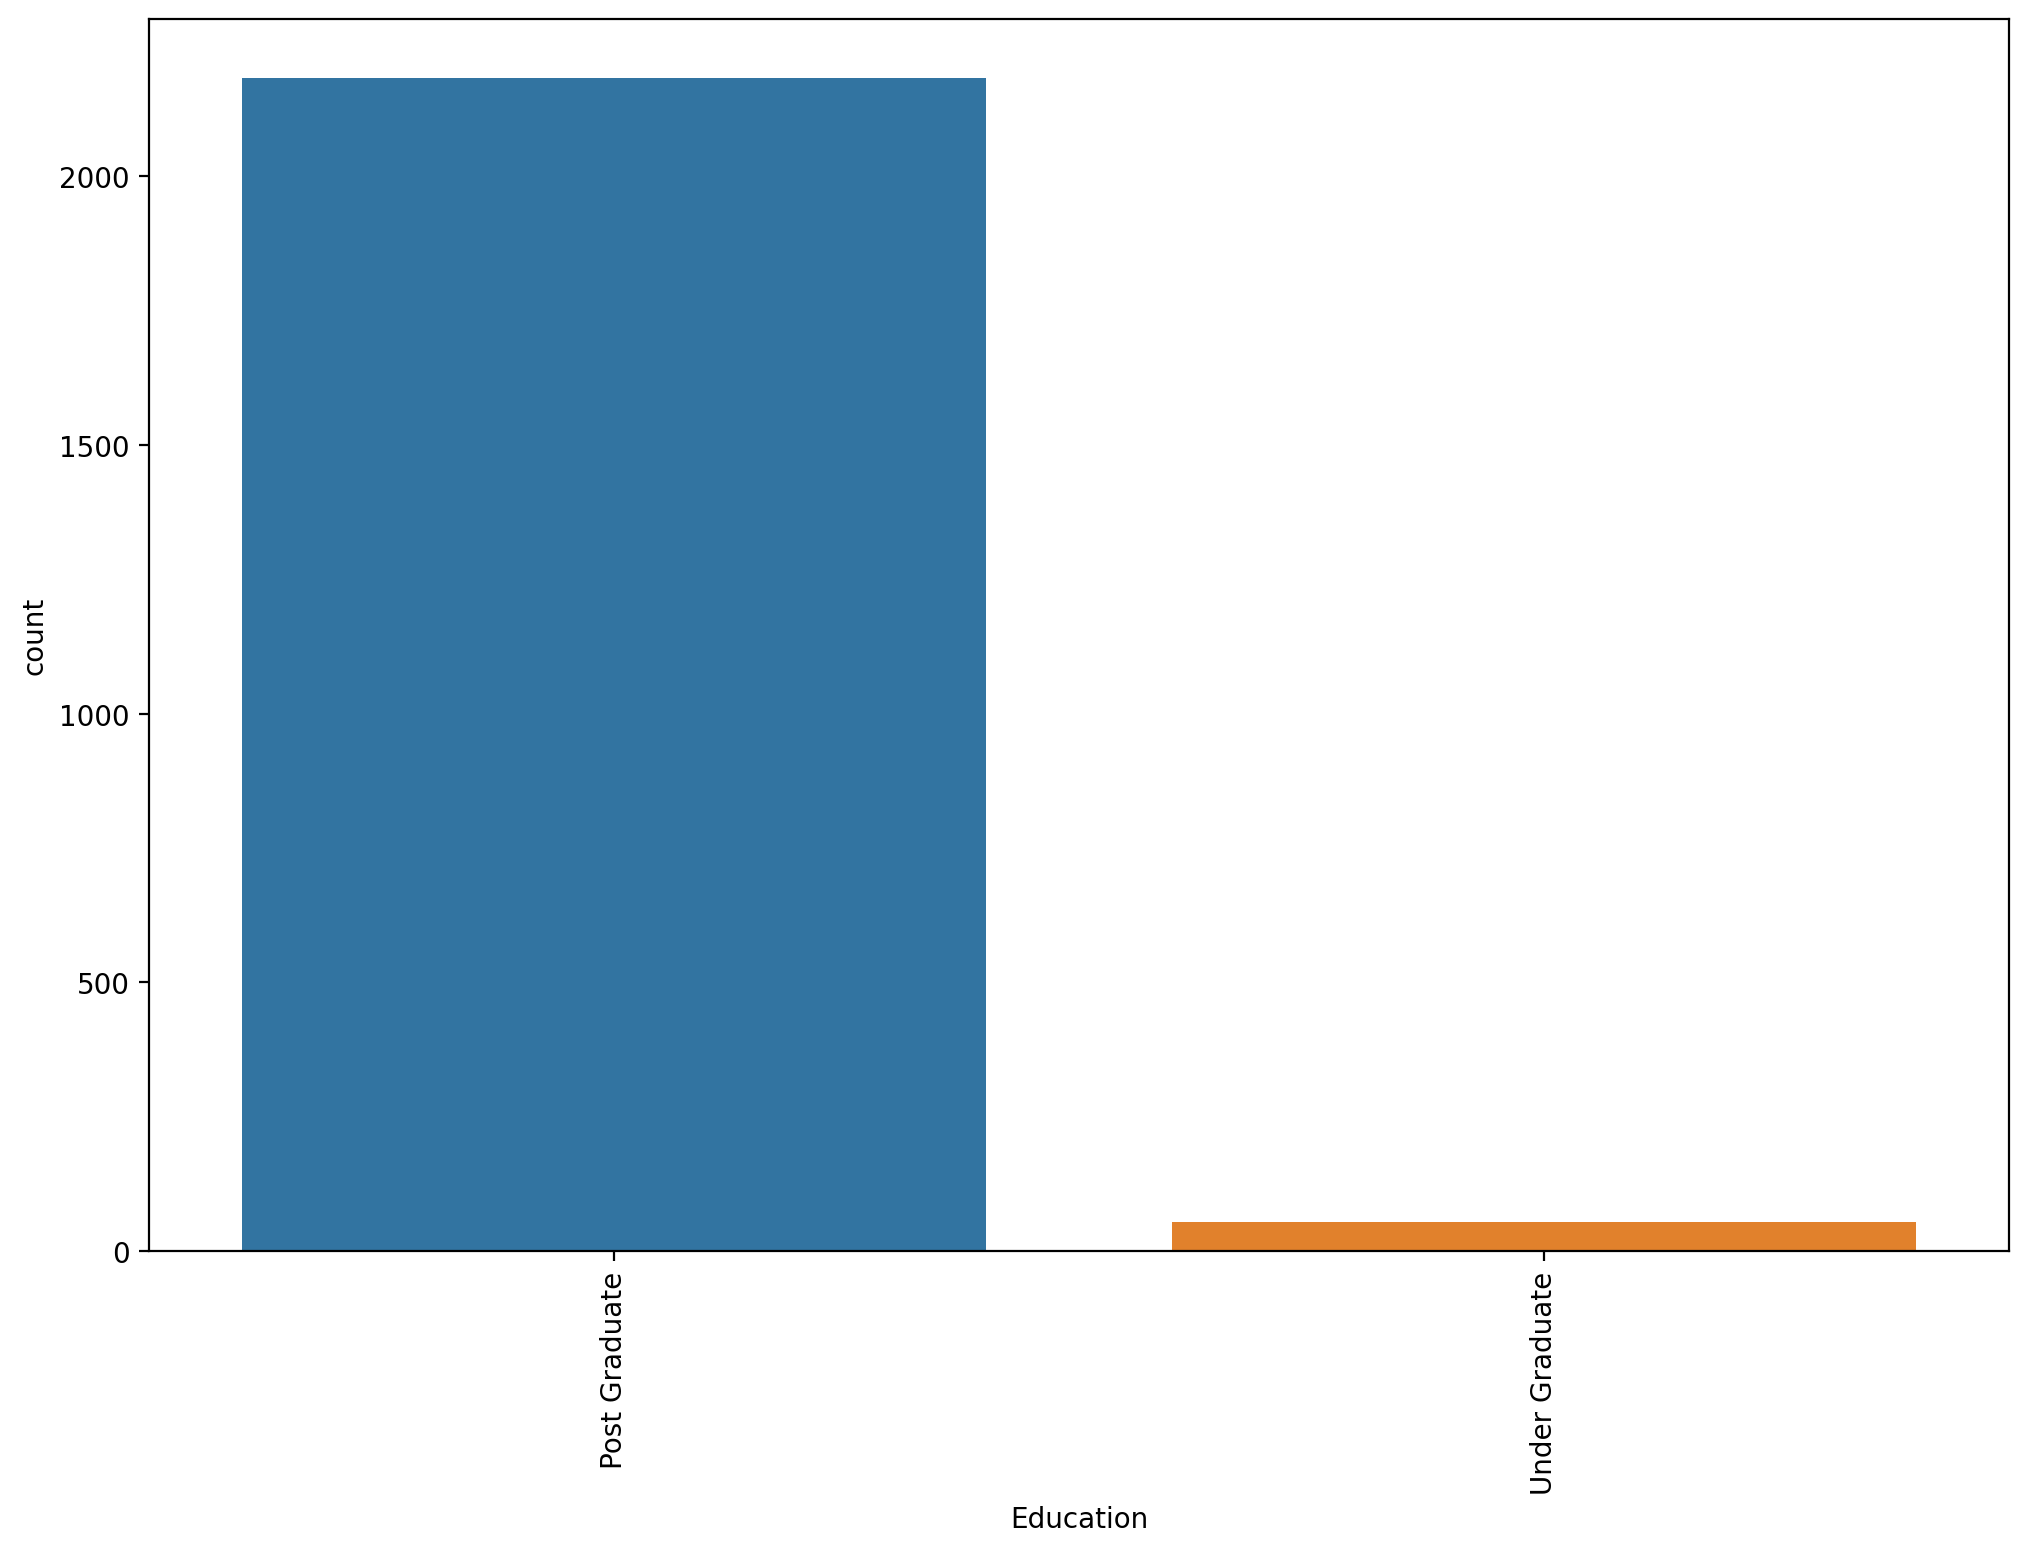

In [32]:
visual('Education')

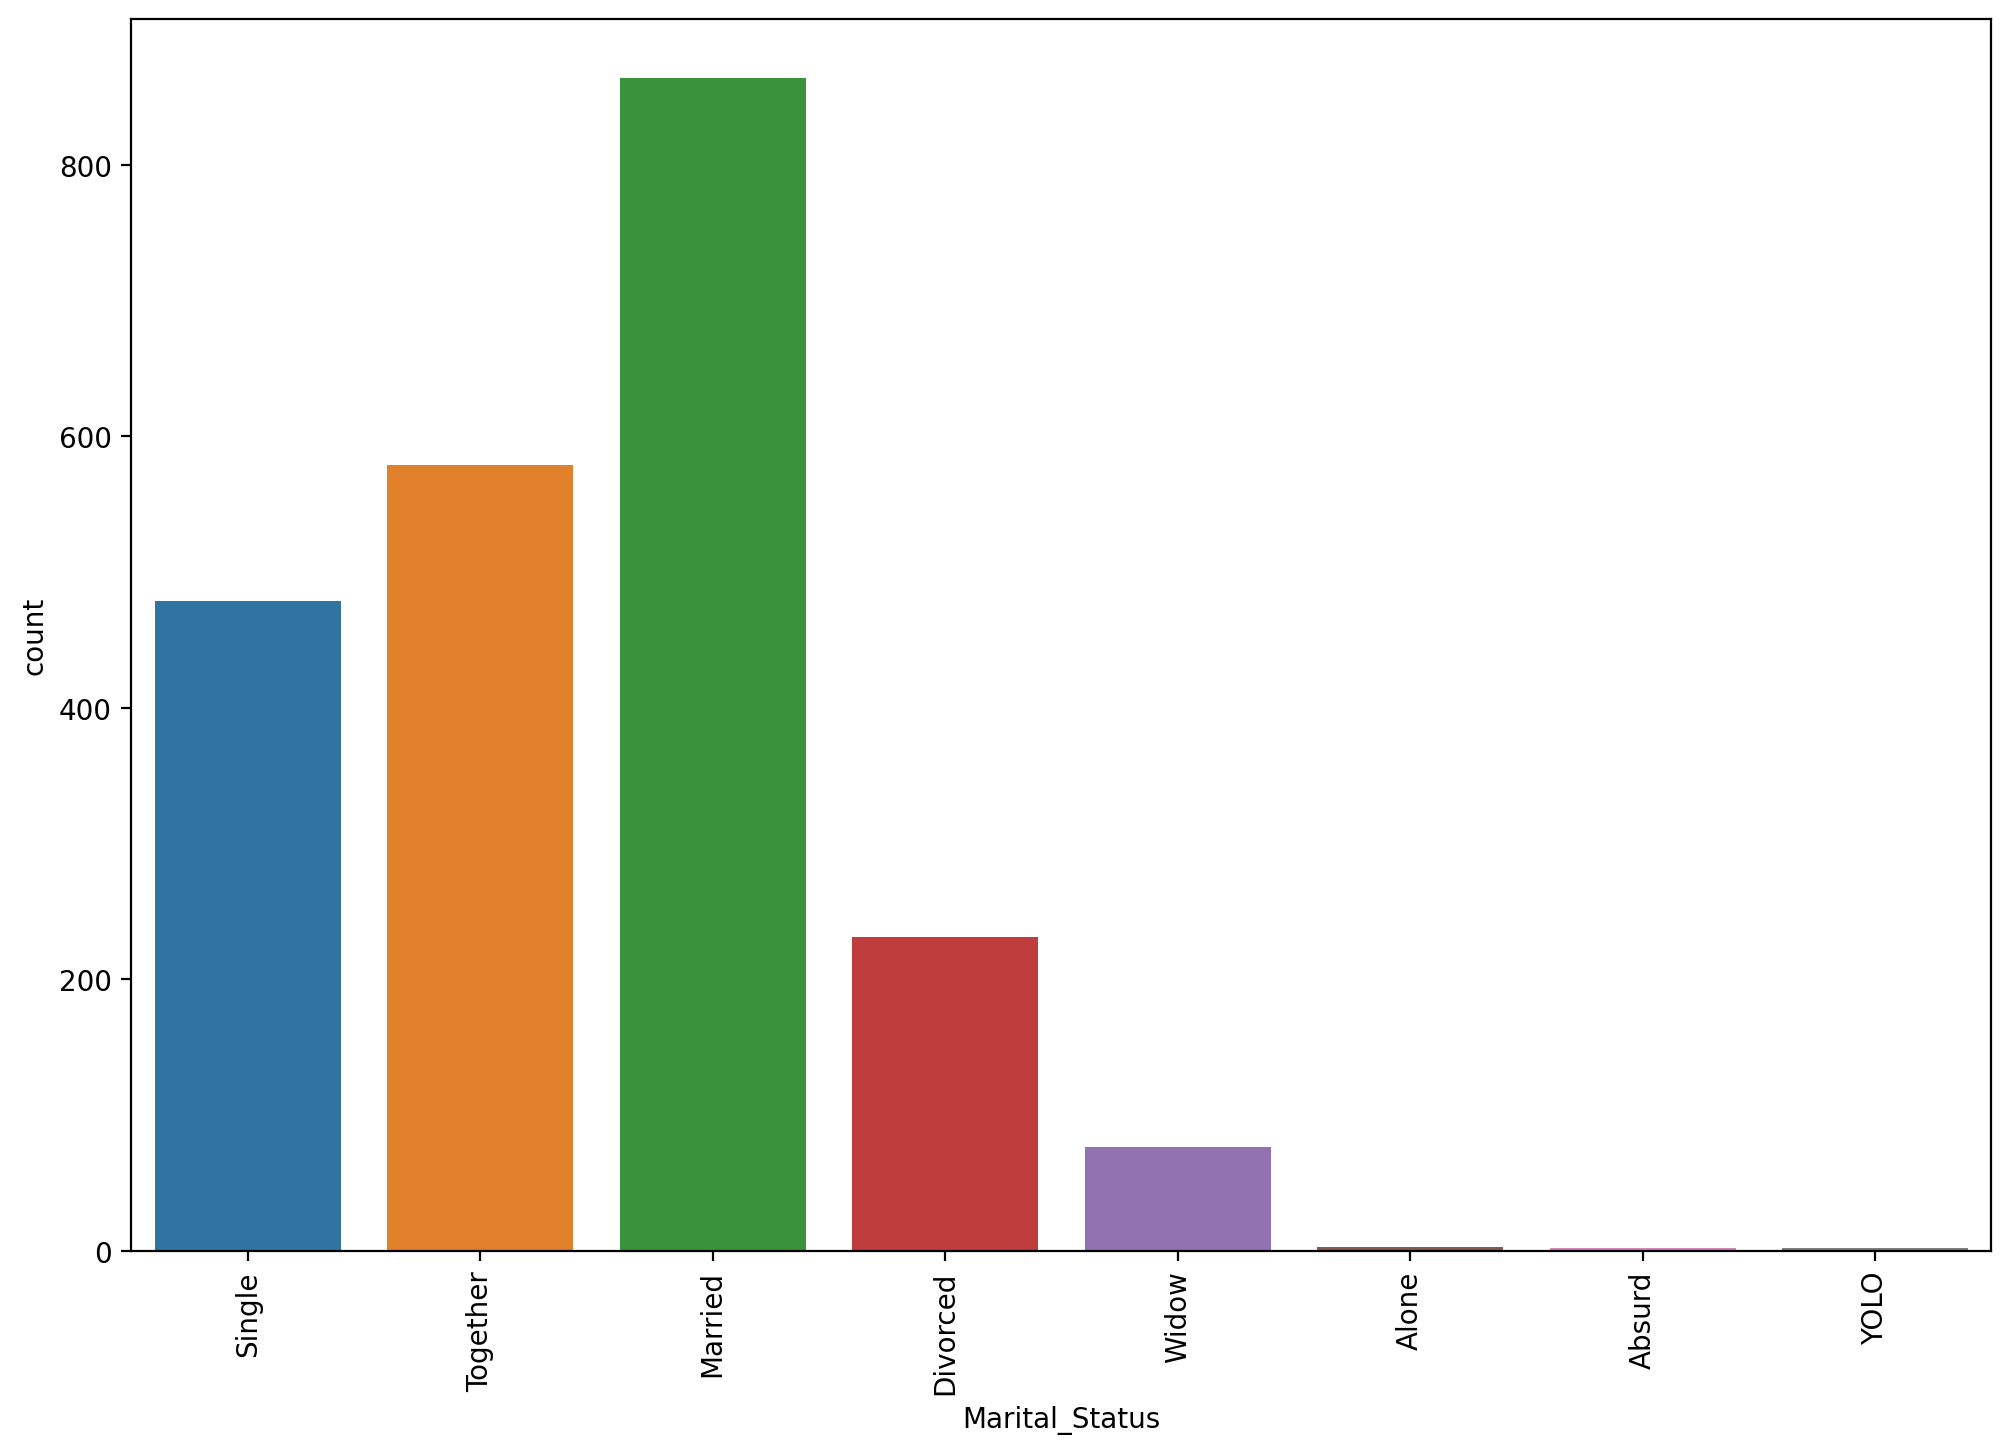

In [33]:
visual('Marital_Status')

In [34]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [35]:
df['Marital_Status']=df['Marital_Status'].replace(['Single', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'],'Single')
df['Marital_Status']=df['Marital_Status'].replace(['Together', 'Married'],'Relationship')

In [36]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')
dates = []
for i in df['Dt_Customer']:
    i = i.date()
    dates.append(i)  
print("The newest customer's enrolment date in the records",max(dates))
print("The oldest customer's enrolment date in the records",min(dates))


The newest customer's enrolment date in the records 2014-06-29
The oldest customer's enrolment date in the records 2012-07-30



Creating a feature ("Customer_For_Period") of the number of days the customers started to shop in the store relative to the last recorded date

In [37]:
days=[]
d1=max(dates)
for i in dates:
    num_days=d1-i
    days.append(num_days)
    
df['Customer_For_Period']=days
df['Customer_For_Period'] = df['Customer_For_Period'].apply(lambda x:x.days)

In [38]:
df['Customer_For_Period']

0       663
1       113
2       312
3       139
4       161
       ... 
2235    381
2236     19
2237    155
2238    156
2239    622
Name: Customer_For_Period, Length: 2237, dtype: int64

In [39]:
df['Complain'].value_counts()

0    2217
1      20
Name: Complain, dtype: int64

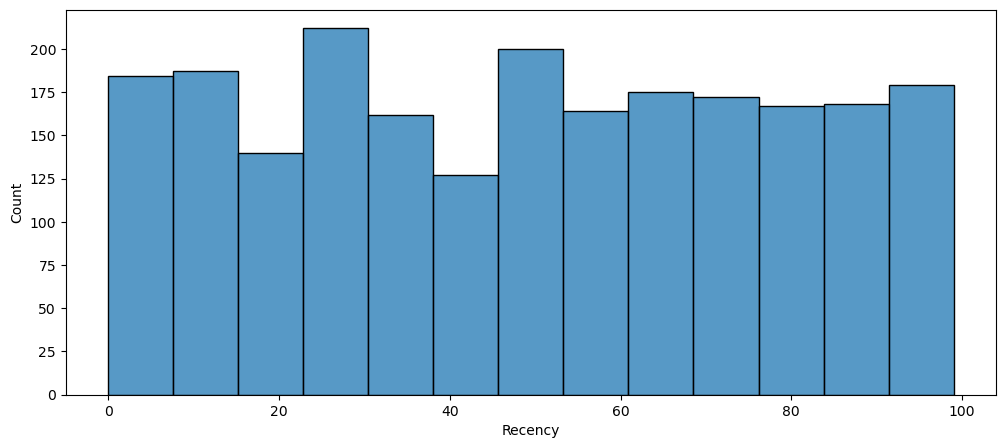

In [40]:
plt.figure(figsize=(12,5))
sns.histplot(df['Recency'])
plt.show()

In [41]:
df['Kidhome'].nunique()

3

In [42]:
df['Kids'] = df['Kidhome'] + df['Teenhome']

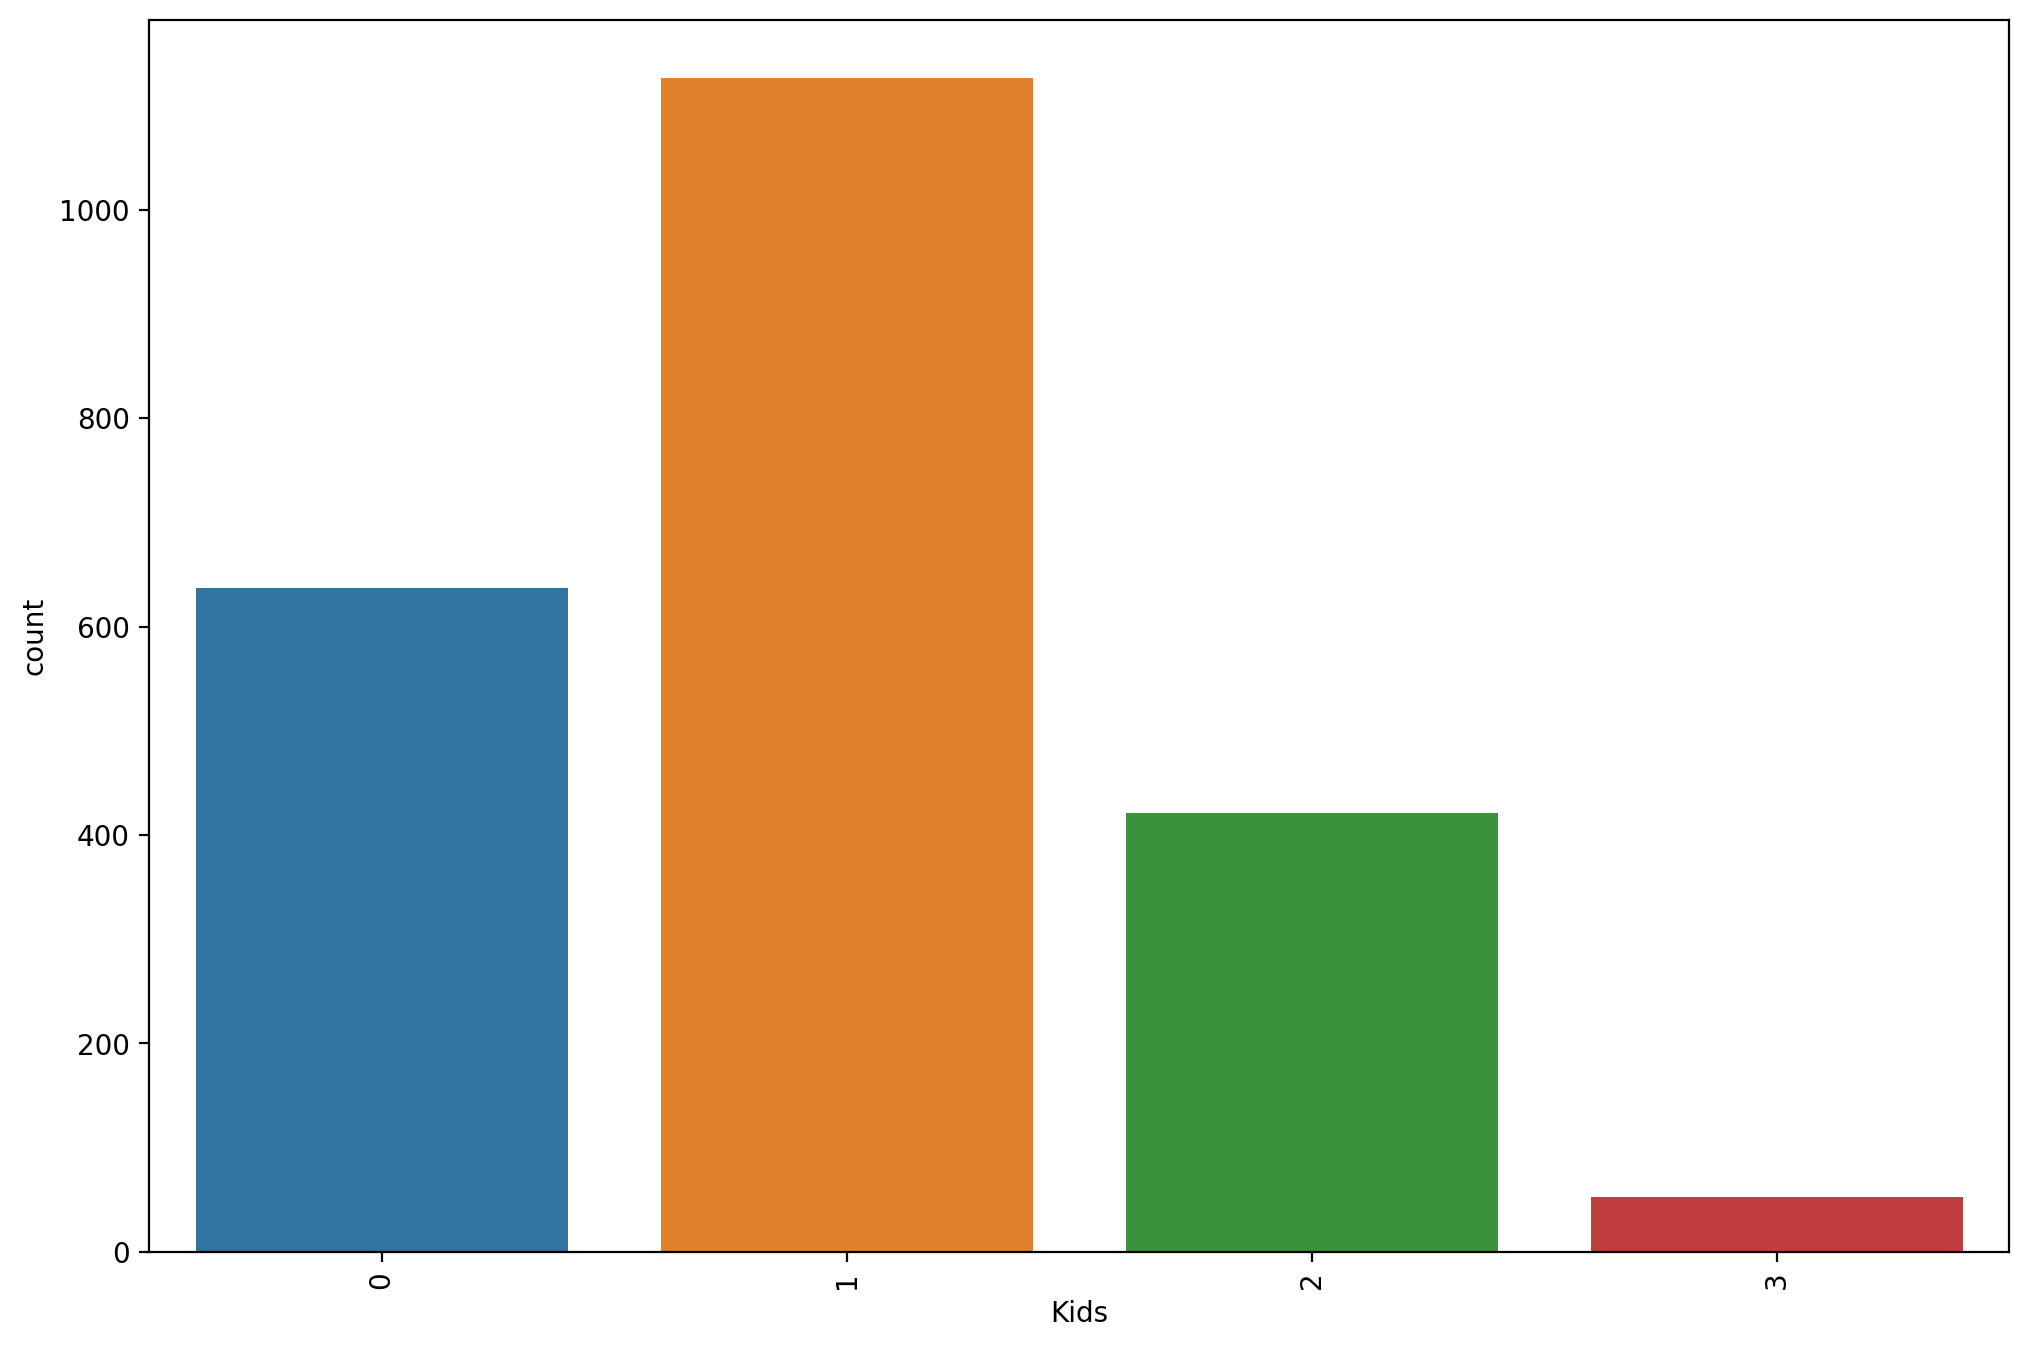

In [43]:
visual('Kids')

In [44]:
df['Complain'].value_counts()

0    2217
1      20
Name: Complain, dtype: int64

In [45]:
# Combining different dataframe into a single column to reduce the number of dimension

df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Expenses'].sort_values(ascending=False).head(10)

1572    2525
1179    2525
1492    2524
987     2486
1052    2440
1601    2352
1458    2349
1288    2346
1301    2302
943     2302
Name: Expenses, dtype: int64

In [46]:
df['Expenses'].describe()

count    2237.000000
mean      605.743406
std       601.840466
min         5.000000
25%        69.000000
50%       396.000000
75%      1045.000000
max      2525.000000
Name: Expenses, dtype: float64

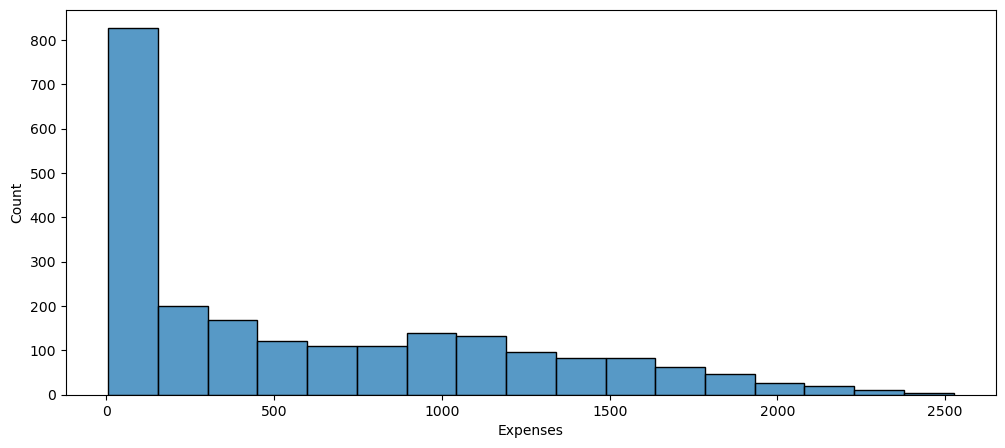

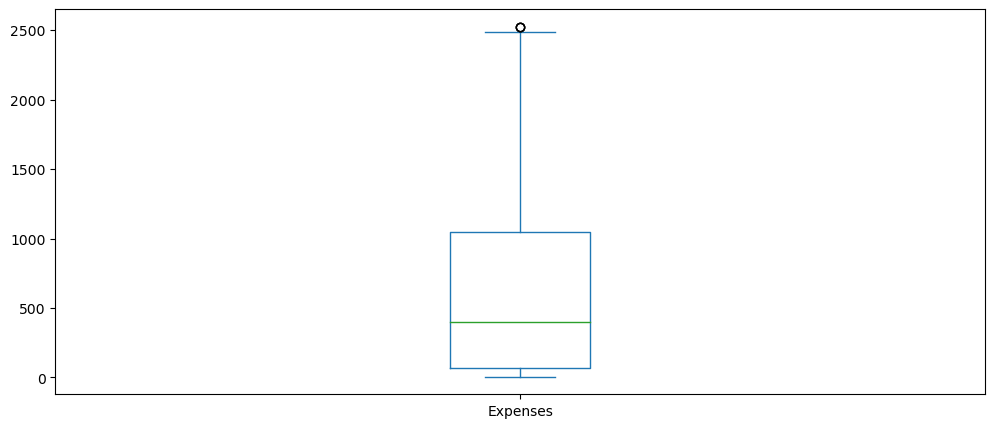

In [47]:
plt.figure(figsize=(12,5))
sns.histplot(df["Expenses"])
plt.show()
df["Expenses"].plot.box(figsize=(12,5))
plt.show()

In [48]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [49]:
df['TotalAcceptedCmp'].value_counts()

0    1775
1     324
2      83
3      44
4      11
Name: TotalAcceptedCmp, dtype: int64

In [50]:
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df['NumTotalPurchases'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2,  4, 16, 15,  5, 26,  9, 13, 12, 43,
       17, 20, 14, 27, 11, 18, 28,  7, 24, 29, 23, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44], dtype=int64)

In [51]:
df[['NumTotalPurchases']]

,NumTotalPurchases
0,25
1,6
2,21
3,8
4,19
...,...
2235,18
2236,22
2237,19
2238,23


In [52]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_For_Period,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,Post Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,1,67,663,0,1617,0,25
1,2174,1954,Post Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,70,113,2,27,0,6
2,4141,1965,Post Graduate,Relationship,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,59,312,0,776,0,21
3,6182,1984,Post Graduate,Relationship,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,40,139,1,53,0,8
4,5324,1981,Post Graduate,Relationship,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,43,161,1,422,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Post Graduate,Relationship,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,57,381,1,1341,0,18
2236,4001,1946,Post Graduate,Relationship,64014.0,2,1,2014-06-10,56,406,...,1,0,0,0,78,19,3,444,1,22
2237,7270,1981,Post Graduate,Single,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,43,155,0,1241,1,19
2238,8235,1956,Post Graduate,Relationship,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,68,156,1,843,0,23


In [53]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_For_Period',
       'Kids', 'Expenses', 'TotalAcceptedCmp', 'NumTotalPurchases'],
      dtype='object')

In [54]:
col_del = ["Year_Birth","ID","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)

In [55]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Age,Customer_For_Period,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,Post Graduate,Single,58138.0,2012-09-04,58,0,1,67,663,0,1617,0,25
1,Post Graduate,Single,46344.0,2014-03-08,38,0,0,70,113,2,27,0,6
2,Post Graduate,Relationship,71613.0,2013-08-21,26,0,0,59,312,0,776,0,21
3,Post Graduate,Relationship,26646.0,2014-02-10,26,0,0,40,139,1,53,0,8
4,Post Graduate,Relationship,58293.0,2014-01-19,94,0,0,43,161,1,422,0,19


In [56]:
df.drop(['Dt_Customer','Recency','Complain','Response'],axis=1,inplace=True)

In [57]:
df.head()

,Education,Marital_Status,Income,Age,Customer_For_Period,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,Post Graduate,Single,58138.0,67,663,0,1617,0,25
1,Post Graduate,Single,46344.0,70,113,2,27,0,6
2,Post Graduate,Relationship,71613.0,59,312,0,776,0,21
3,Post Graduate,Relationship,26646.0,40,139,1,53,0,8
4,Post Graduate,Relationship,58293.0,43,161,1,422,0,19


In [58]:
df.shape

(2237, 9)

# Bivariate Analysis :-

1.Education vs Expenses

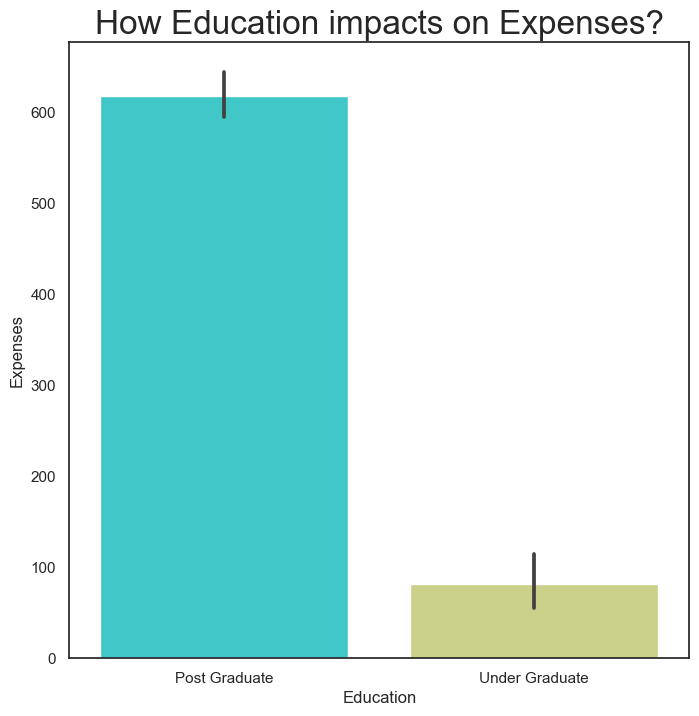

In [59]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Education impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Education", y="Expenses", data=df,palette="rainbow")

2.Marital status vs Expenses

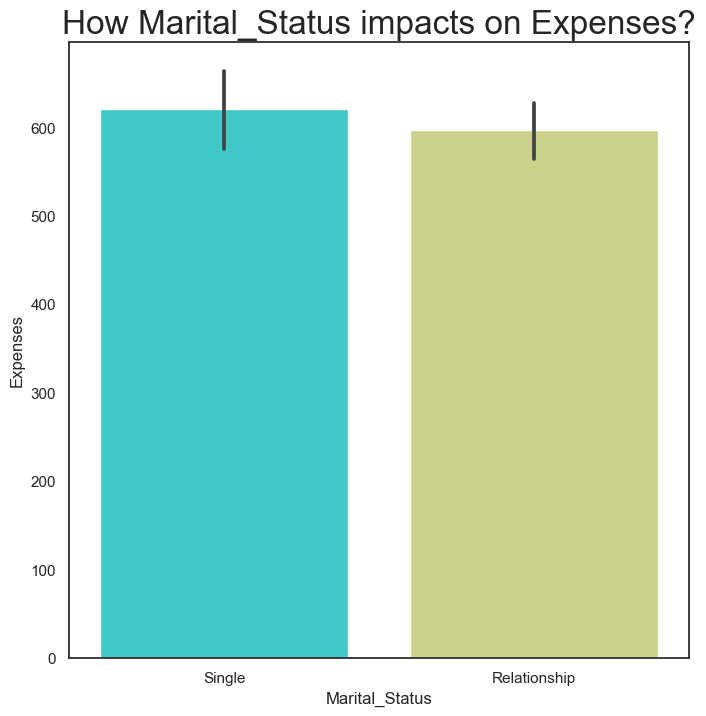

In [60]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Marital_Status impacts on Expenses?",fontsize=24)
sns.barplot(x="Marital_Status", y="Expenses", data=df,palette="rainbow");

3.Kids vs Expenses

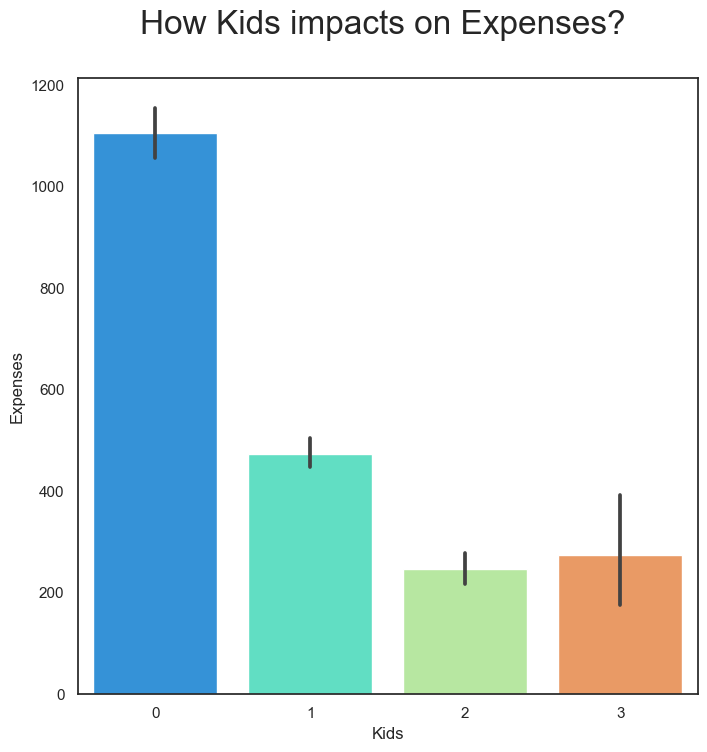

In [61]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Kids impacts on Expenses? \n",fontsize=24)
sns.barplot(x="Kids", y="Expenses", data=df,palette="rainbow");

4.TotalAcceptedCmp vs Expenses

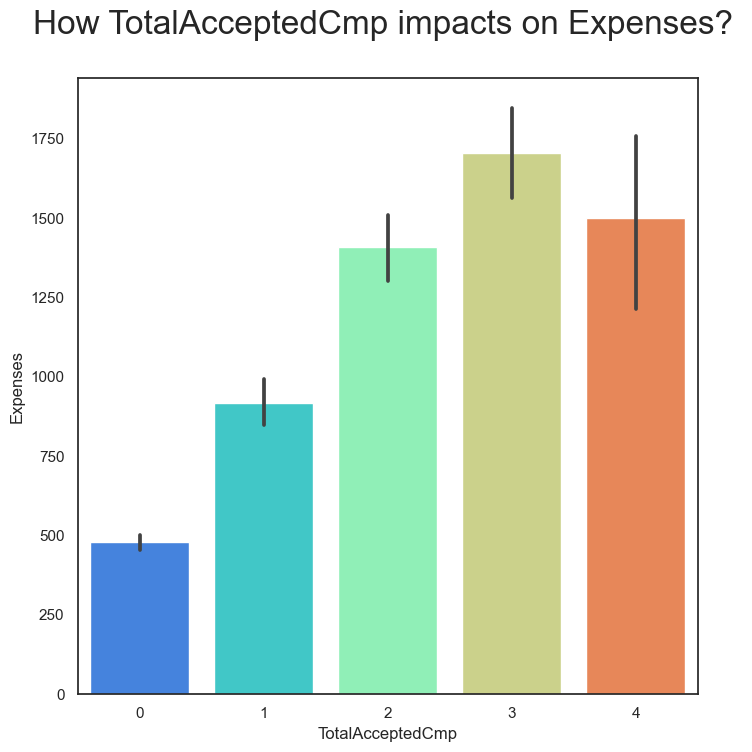

In [62]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How TotalAcceptedCmp impacts on Expenses? \n",fontsize=24)
sns.barplot(x="TotalAcceptedCmp", y="Expenses", data=df,palette="rainbow");

5.NumTotalPurchases vs Expenses

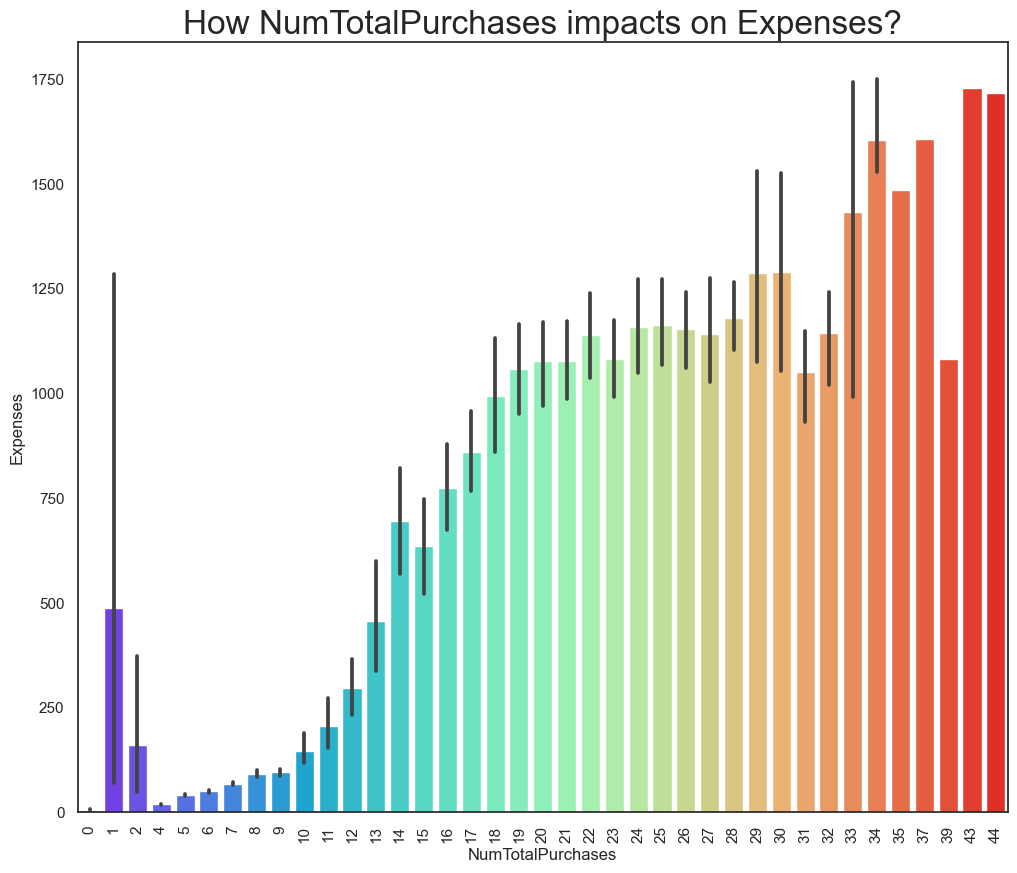

In [63]:
sns.set_theme(style="white")
plt.figure(figsize=(12,10))
plt.title("How NumTotalPurchases impacts on Expenses?",fontsize=24)
plt.xticks(rotation=90)
sns.barplot(x="NumTotalPurchases", y="Expenses", data=df,palette="rainbow");

6.Day engaged vs Expenses

In [64]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Age', 'Customer_For_Period',
       'Kids', 'Expenses', 'TotalAcceptedCmp', 'NumTotalPurchases'],
      dtype='object')

<Axes: title={'center': 'How Days Engaged impacts on Expenses?'}, xlabel='Customer_For_Period', ylabel='Expenses'>

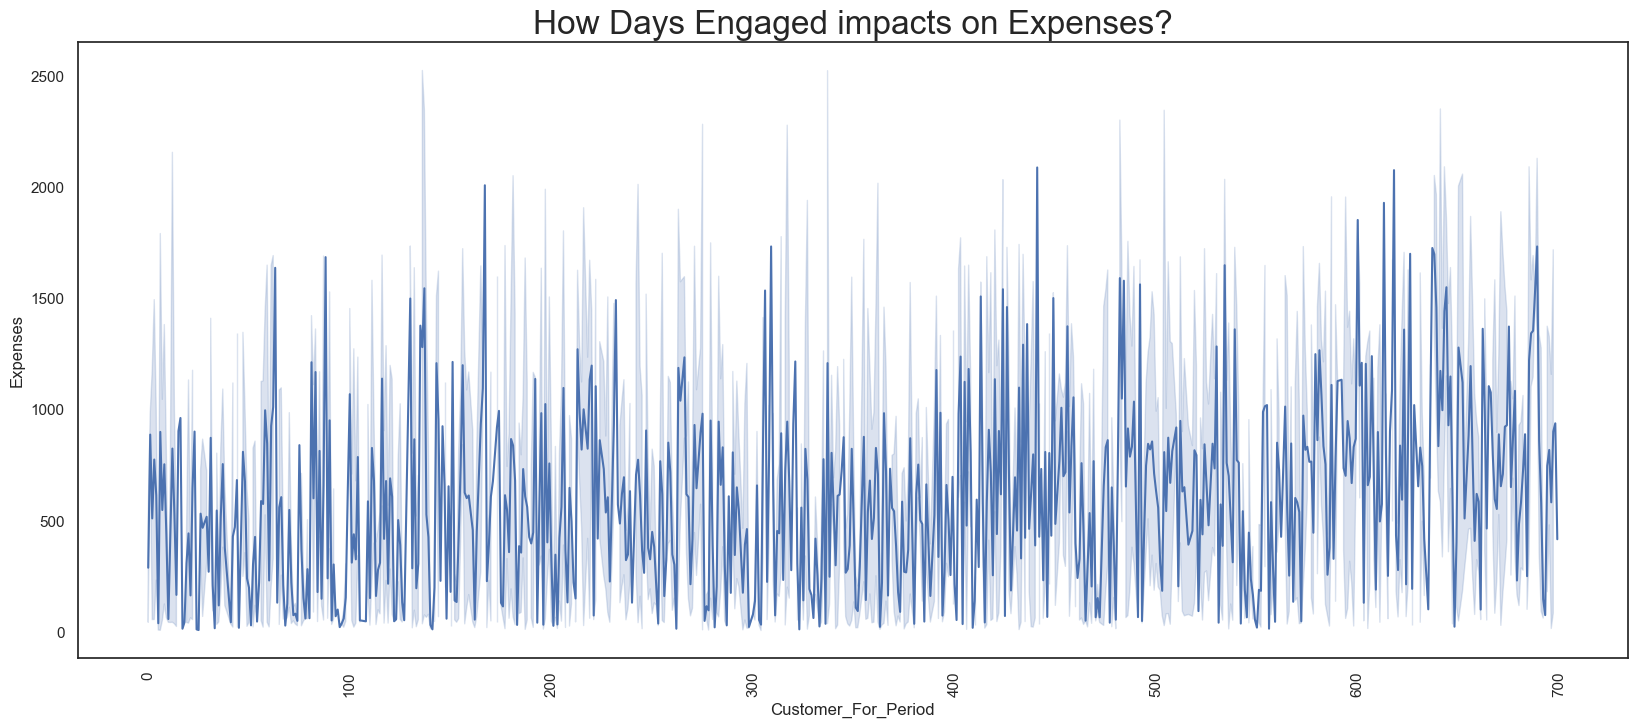

In [65]:
sns.set_theme(style="white")
plt.figure(figsize=(20,8))
plt.title("How Days Engaged impacts on Expenses?",fontsize=24)
plt.xticks(rotation=90)
sns.lineplot(x="Customer_For_Period", y="Expenses", data=df,palette="rainbow")

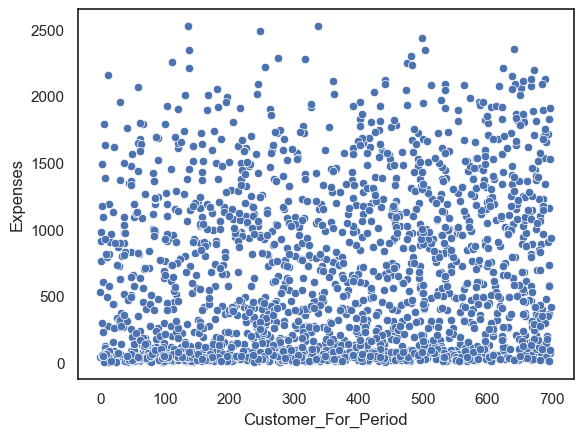

In [66]:
sns.scatterplot(x=df['Customer_For_Period'],y=df['Expenses'])

plt.show()

No relationship between days enagaged vs expenses

7.Customer Age vs Expenses

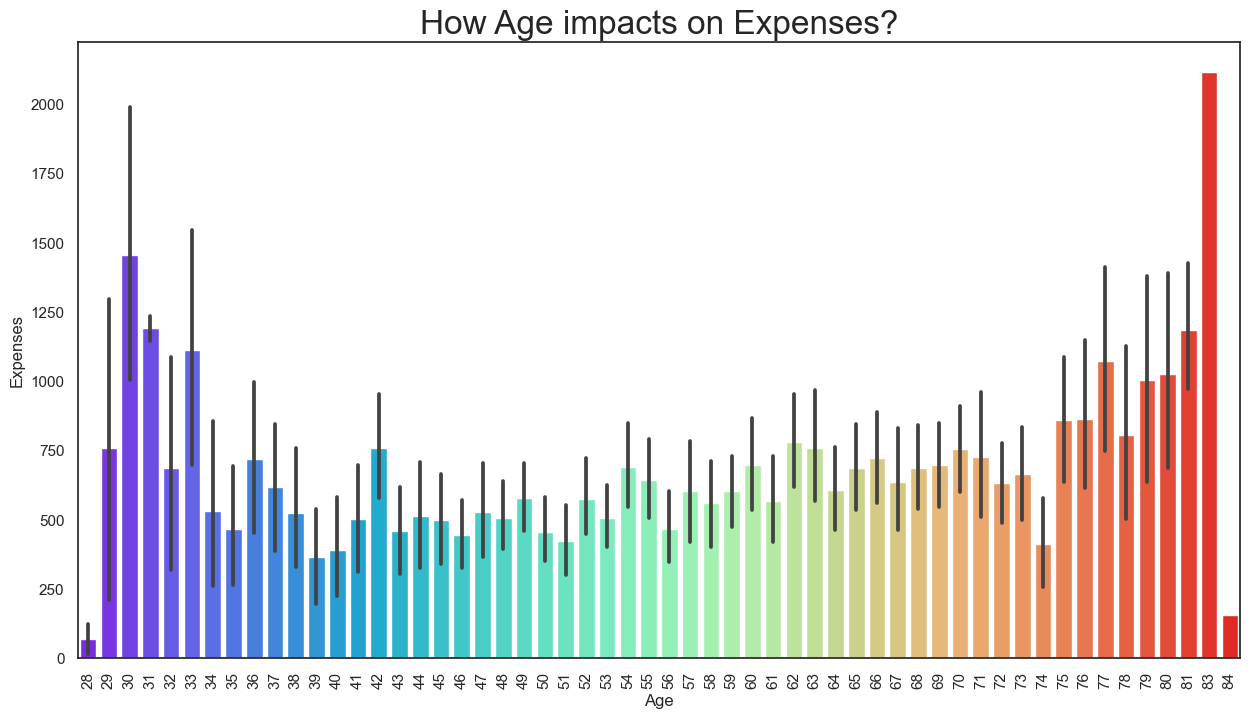

In [67]:
sns.set_theme(style="white")
plt.figure(figsize=(15,8))
plt.title("How Age impacts on Expenses?",fontsize=24)
plt.xticks(rotation=90)
ax = sns.barplot(x="Age", y="Expenses", data=df,palette="rainbow")

plt.show()

People who are in middle age have less expenses than others

# Remove some outliers present in income

In [68]:
df['Income'].describe()

count      2237.000000
mean      52227.407689
std       25043.266830
min        1730.000000
25%       35523.000000
50%       51381.500000
75%       68281.000000
max      666666.000000
Name: Income, dtype: float64

<Axes: >

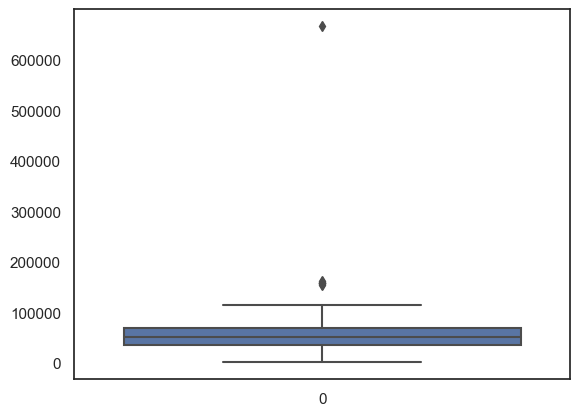

In [69]:
sns.boxplot(df['Income'])

In [70]:
df = df[df['Income'] < 300000]

In [71]:
df.shape

(2236, 9)

In [72]:
df.head()

,Education,Marital_Status,Income,Age,Customer_For_Period,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,Post Graduate,Single,58138.0,67,663,0,1617,0,25
1,Post Graduate,Single,46344.0,70,113,2,27,0,6
2,Post Graduate,Relationship,71613.0,59,312,0,776,0,21
3,Post Graduate,Relationship,26646.0,40,139,1,53,0,8
4,Post Graduate,Relationship,58293.0,43,161,1,422,0,19


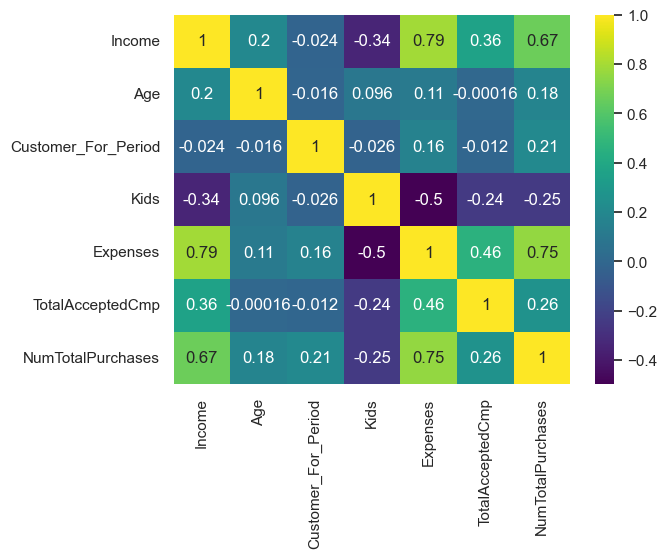

In [73]:
sns.heatmap(df.corr(),annot=True,cmap= 'viridis' );

Income is more positively correlated to Expenses and Number of purchases

Expenses is positively correlated to Income and Number of pur chases and negitively correlated with Kids

In [74]:
df.head()

,Education,Marital_Status,Income,Age,Customer_For_Period,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,Post Graduate,Single,58138.0,67,663,0,1617,0,25
1,Post Graduate,Single,46344.0,70,113,2,27,0,6
2,Post Graduate,Relationship,71613.0,59,312,0,776,0,21
3,Post Graduate,Relationship,26646.0,40,139,1,53,0,8
4,Post Graduate,Relationship,58293.0,43,161,1,422,0,19


In [75]:
df_object=df.select_dtypes(include=object)

In [76]:
df_object=pd.get_dummies(df_object,drop_first=True)

In [77]:
df_object

,Education_Under Graduate,Marital_Status_Single
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
2235,0,0
2236,0,0
2237,0,1
2238,0,0


In [78]:
df_numeric=df.select_dtypes(exclude=object)

In [79]:
df_numeric

,Income,Age,Customer_For_Period,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,58138.0,67,663,0,1617,0,25
1,46344.0,70,113,2,27,0,6
2,71613.0,59,312,0,776,0,21
3,26646.0,40,139,1,53,0,8
4,58293.0,43,161,1,422,0,19
...,...,...,...,...,...,...,...
2235,61223.0,57,381,1,1341,0,18
2236,64014.0,78,19,3,444,1,22
2237,56981.0,43,155,0,1241,1,19
2238,69245.0,68,156,1,843,0,23


In [80]:
df=pd.concat([df_object,df_numeric], axis=1, join='inner')

In [81]:
df

,Education_Under Graduate,Marital_Status_Single,Income,Age,Customer_For_Period,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,0,1,58138.0,67,663,0,1617,0,25
1,0,1,46344.0,70,113,2,27,0,6
2,0,0,71613.0,59,312,0,776,0,21
3,0,0,26646.0,40,139,1,53,0,8
4,0,0,58293.0,43,161,1,422,0,19
...,...,...,...,...,...,...,...,...,...
2235,0,0,61223.0,57,381,1,1341,0,18
2236,0,0,64014.0,78,19,3,444,1,22
2237,0,1,56981.0,43,155,0,1241,1,19
2238,0,0,69245.0,68,156,1,843,0,23


In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler=StandardScaler()
col_scale=['Income','Age','Customer_For_Period','Kids','Expenses','TotalAcceptedCmp','NumTotalPurchases']

df[col_scale]=scaler.fit_transform(df[col_scale])

In [101]:
df.head()

,Education_Under Graduate,Marital_Status_Single,Income,Age,Customer_For_Period,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,0,1,0.288947,1.016868,1.529793,-1.264308,1.680176,-0.438933,1.319340
1,0,1,-0.262003,1.273264,-1.191143,1.395139,-0.962202,-0.438933,-1.155857
2,0,0,0.918423,0.333146,-0.206659,-1.264308,0.282541,-0.438933,0.798246
3,0,0,-1.182183,-1.290693,-1.062517,0.065416,-0.918994,-0.438933,-0.895310
4,0,0,0.296187,-1.034298,-0.953679,0.065416,-0.305762,-0.438933,0.537699


# Model Building

### K-Means

In [102]:
from sklearn.cluster import KMeans

In [120]:
X_1= df.copy()

In [121]:
ssd=[]

for i in range (1,11):
        model=KMeans(n_clusters=i)
        model.fit(X_1)
        ssd.append(model.inertia_)

In [122]:
ssd

[16216.747763864041,
 11082.62623864041,
 9584.903147317447,
 8541.626545419032,
 7791.156256656186,
 7231.260621960705,
 7060.603668128833,
 6545.90131638198,
 6050.578702167759,
 5826.786029070148]

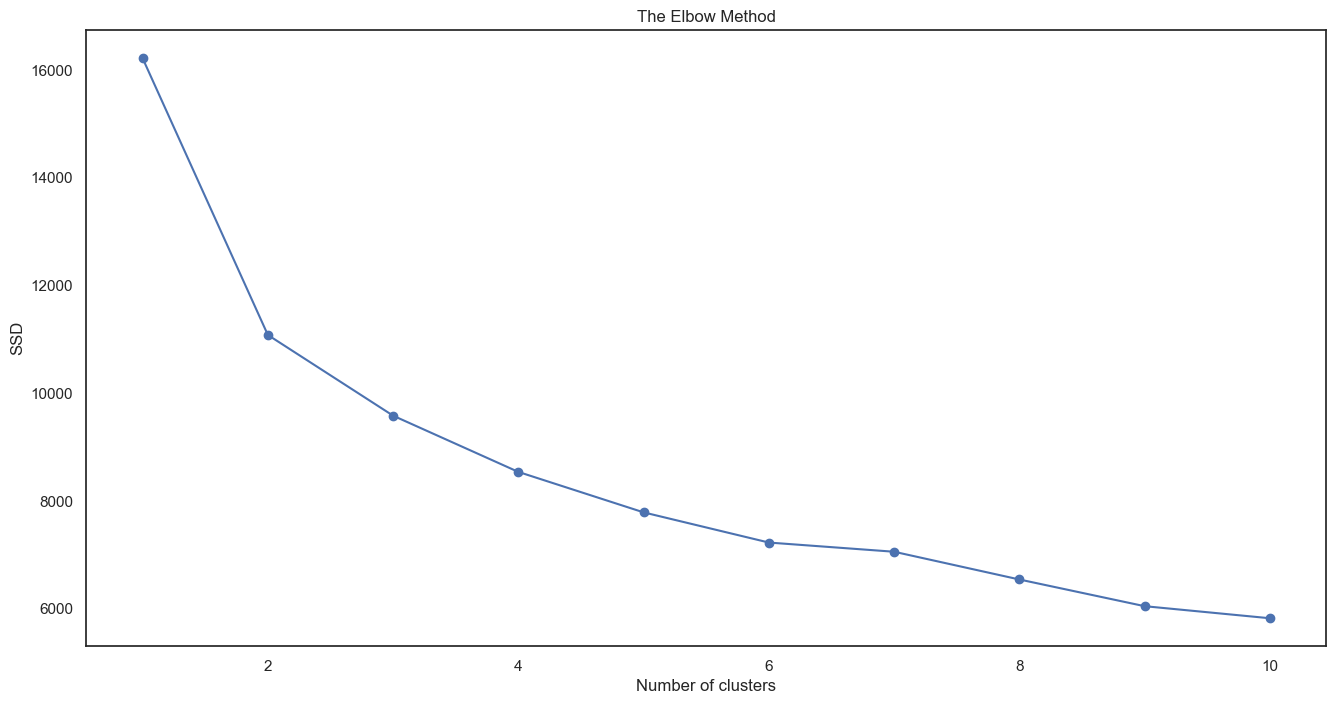

In [123]:
plt.figure(figsize=(16,8))
plt.plot(range(1,11),ssd, 'bo-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.show()

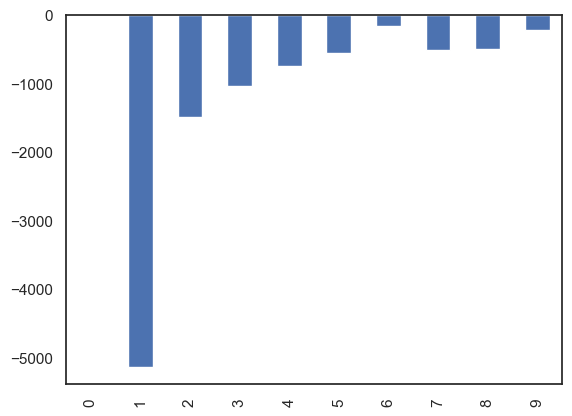

In [124]:
pd.Series(ssd).diff().plot(kind='bar');

In [126]:
model=KMeans(n_clusters=2)
model.fit(X_1)

KMeans(n_clusters=2)

In [127]:
model.labels_

array([0, 1, 0, ..., 0, 0, 1])

In [129]:
X_1['K=2 Cluster Labels']=model.labels_


In [130]:
X_1

,Education_Under Graduate,Marital_Status_Single,Income,Age,Customer_For_Period,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,K=2 Cluster Labels
0,0,1,0.288947,1.016868,1.529793,-1.264308,1.680176,-0.438933,1.319340,0
1,0,1,-0.262003,1.273264,-1.191143,1.395139,-0.962202,-0.438933,-1.155857,1
2,0,0,0.918423,0.333146,-0.206659,-1.264308,0.282541,-0.438933,0.798246,0
3,0,0,-1.182183,-1.290693,-1.062517,0.065416,-0.918994,-0.438933,-0.895310,1
4,0,0,0.296187,-1.034298,-0.953679,0.065416,-0.305762,-0.438933,0.537699,1
...,...,...,...,...,...,...,...,...,...,...
2235,0,0,0.433060,0.162216,0.134695,0.065416,1.221499,-0.438933,0.407425,0
2236,0,0,0.563440,1.956986,-1.656175,2.724862,-0.269201,1.034721,0.928519,0
2237,0,1,0.234898,-1.034298,-0.983362,-1.264308,1.055312,1.034721,0.537699,0
2238,0,0,0.807803,1.102333,-0.978415,0.065416,0.393886,-0.438933,1.058793,0


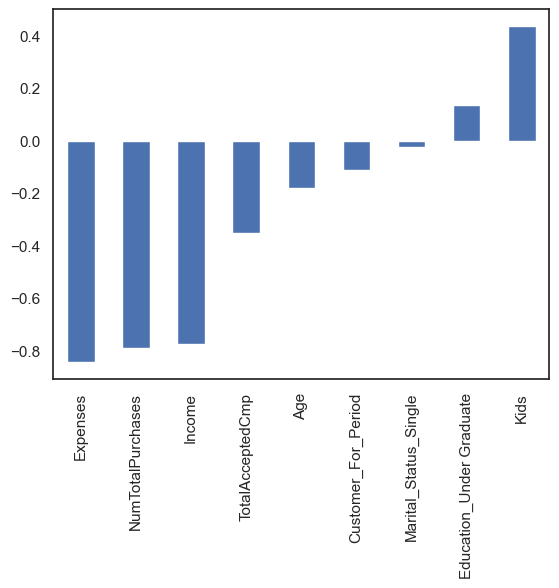

In [133]:
X_1.corr()['K=2 Cluster Labels'].sort_values()[:-1].plot(kind='bar');

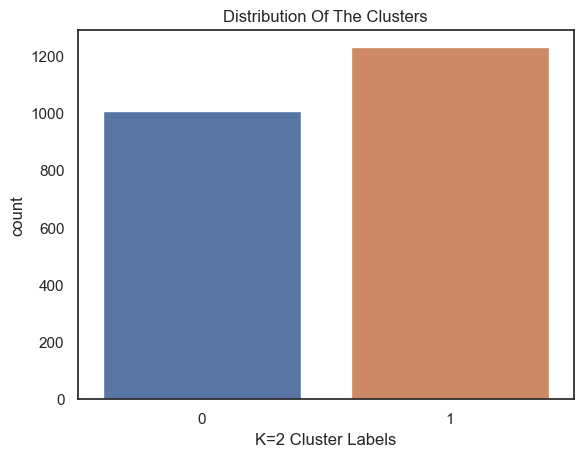

In [134]:
sns.countplot(x=X_1['K=2 Cluster Labels'])
plt.title("Distribution Of The Clusters")
plt.show()

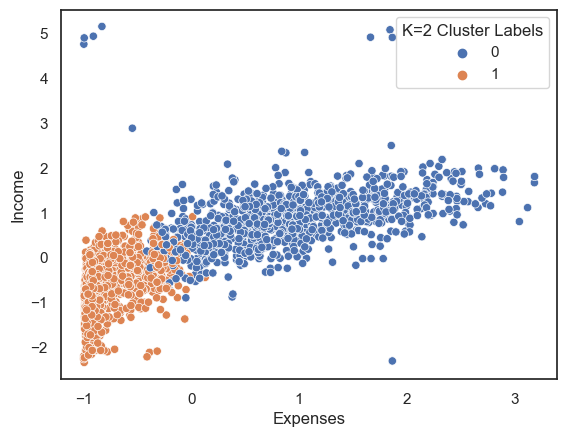

In [164]:
sns.scatterplot(x=X_1['Expenses'],y=X_1['Income'],hue=X_1['K=2 Cluster Labels']);

# PCA  with Agglomerative clustering

In [139]:
from sklearn.decomposition import PCA

In [140]:
df.head()

,Education_Under Graduate,Marital_Status_Single,Income,Age,Customer_For_Period,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,0,1,0.288947,1.016868,1.529793,-1.264308,1.680176,-0.438933,1.319340
1,0,1,-0.262003,1.273264,-1.191143,1.395139,-0.962202,-0.438933,-1.155857
2,0,0,0.918423,0.333146,-0.206659,-1.264308,0.282541,-0.438933,0.798246
3,0,0,-1.182183,-1.290693,-1.062517,0.065416,-0.918994,-0.438933,-0.895310
4,0,0,0.296187,-1.034298,-0.953679,0.065416,-0.305762,-0.438933,0.537699


In [141]:
X_2=df.copy()

In [142]:
X_2.head()

,Education_Under Graduate,Marital_Status_Single,Income,Age,Customer_For_Period,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,0,1,0.288947,1.016868,1.529793,-1.264308,1.680176,-0.438933,1.319340
1,0,1,-0.262003,1.273264,-1.191143,1.395139,-0.962202,-0.438933,-1.155857
2,0,0,0.918423,0.333146,-0.206659,-1.264308,0.282541,-0.438933,0.798246
3,0,0,-1.182183,-1.290693,-1.062517,0.065416,-0.918994,-0.438933,-0.895310
4,0,0,0.296187,-1.034298,-0.953679,0.065416,-0.305762,-0.438933,0.537699


In [144]:

#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(X_2)
PCA_ds = pd.DataFrame(pca.transform(X_2), columns=(["PC1","PC2", "PC3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2236.0,4.131062e-17,1.727875,-2.781513,-1.605133,-0.256193,1.383609,5.653584
PC2,2236.0,-3.336627e-17,1.063303,-2.899452,-0.792535,-0.006992,0.732501,3.637695
PC3,2236.0,-5.640489e-17,1.027762,-2.221347,-0.851926,0.004863,0.819979,2.778722


In [146]:
from mpl_toolkits import mplot3d

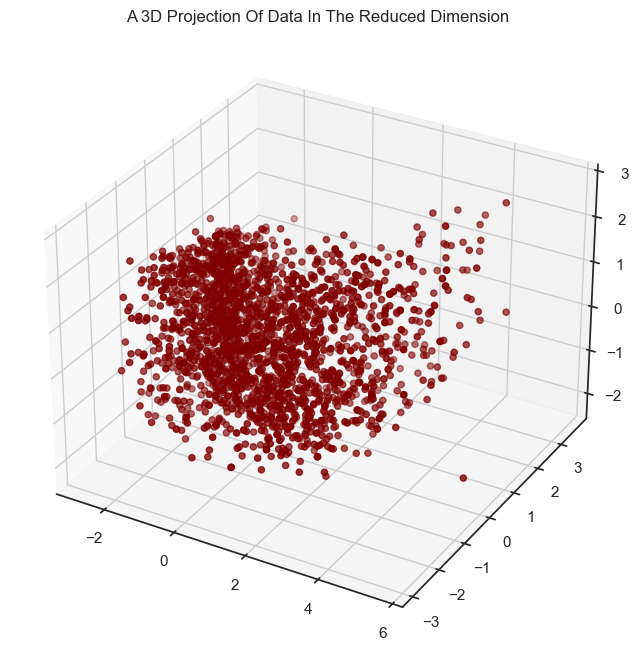

In [151]:
x =PCA_ds['PC1']
y =PCA_ds['PC2']
z =PCA_ds['PC3']
plt.figure(figsize=(10,8))
ax=plt.axes(projection='3d')
ax.scatter3D(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")

plt.show();

In [152]:
from sklearn.cluster import AgglomerativeClustering

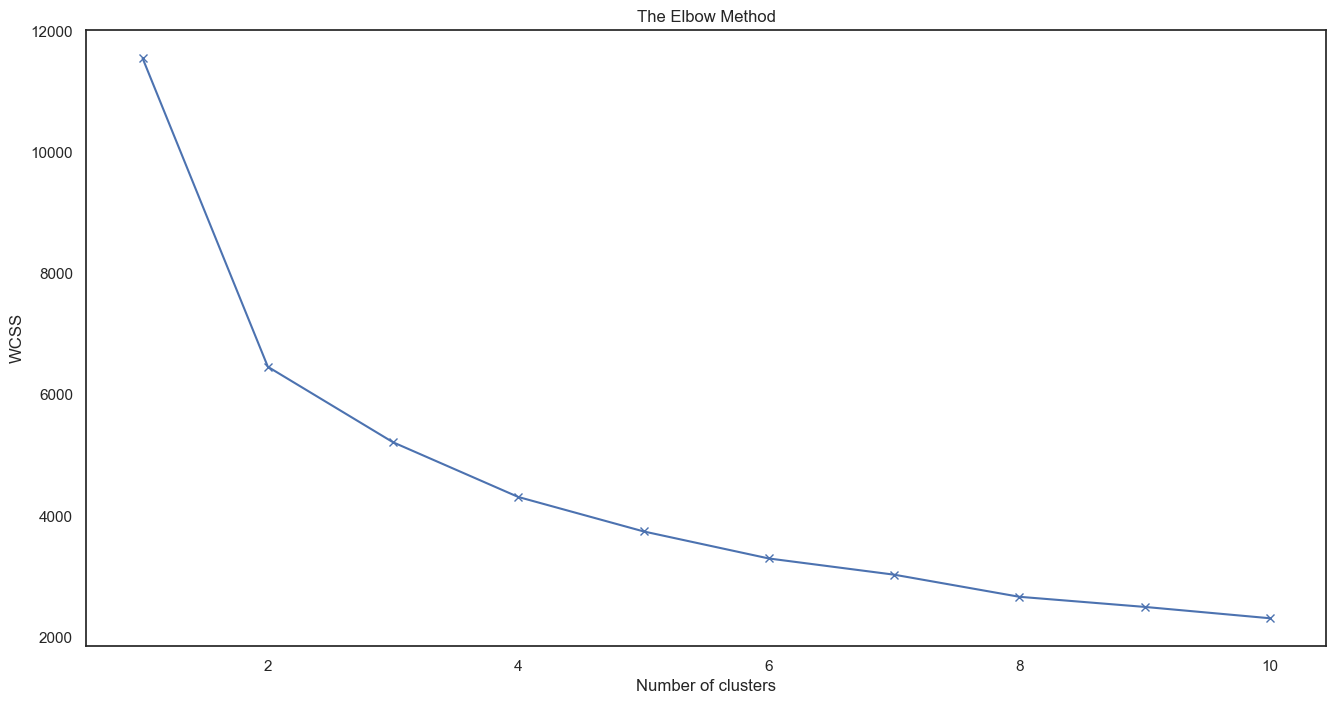

In [153]:
ssd=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(PCA_ds)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),ssd, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

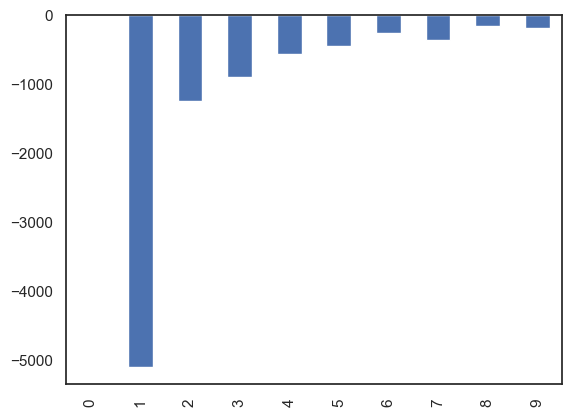

In [157]:
pd.Series(ssd).diff().plot(kind='bar');

SSD is the sum of the squared distance between each point and the centroid in a cluster.

SSD values is more less for k=2 here...so we take k=2

In [158]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=2)

# fit model and predict clusters
AC.fit(PCA_ds)
PCA_ds["Clusters"] = AC.labels_

#Adding the Clusters feature to the orignal dataframe.
X_2["Cluster_Agglo"]= AC.labels_

In [170]:
X_2.head()

,Education_Under Graduate,Marital_Status_Single,Income,Age,Customer_For_Period,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Cluster_Agglo
0,0,1,0.288947,1.016868,1.529793,-1.264308,1.680176,-0.438933,1.319340,0
1,0,1,-0.262003,1.273264,-1.191143,1.395139,-0.962202,-0.438933,-1.155857,1
2,0,0,0.918423,0.333146,-0.206659,-1.264308,0.282541,-0.438933,0.798246,0
3,0,0,-1.182183,-1.290693,-1.062517,0.065416,-0.918994,-0.438933,-0.895310,1
4,0,0,0.296187,-1.034298,-0.953679,0.065416,-0.305762,-0.438933,0.537699,1


In [171]:
X_2.rename(columns={'Education_Under Graduate': 'Education','Marital_Status_Single': 'Marital_Status'}, inplace=True)

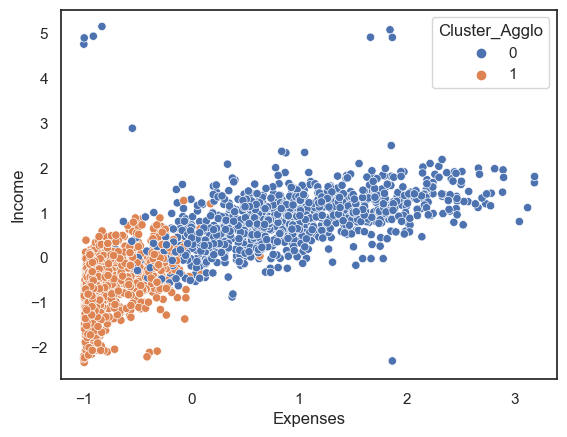

In [163]:
sns.scatterplot(x=X_2['Expenses'],y=X_2['Income'],hue=X_2['Cluster_Agglo']);

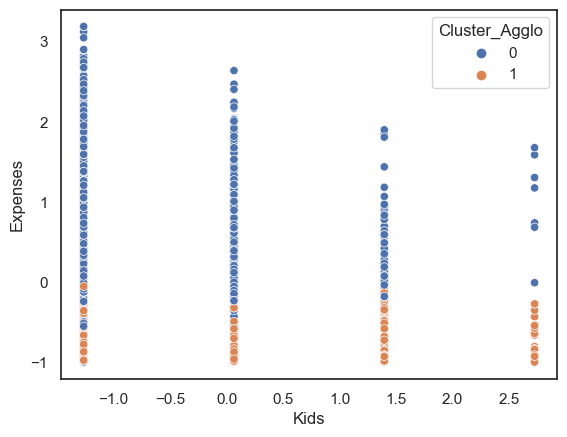

In [168]:
sns.scatterplot(x=X_2['Kids'],y=X_2['Expenses'],hue=X_2['Cluster_Agglo']);

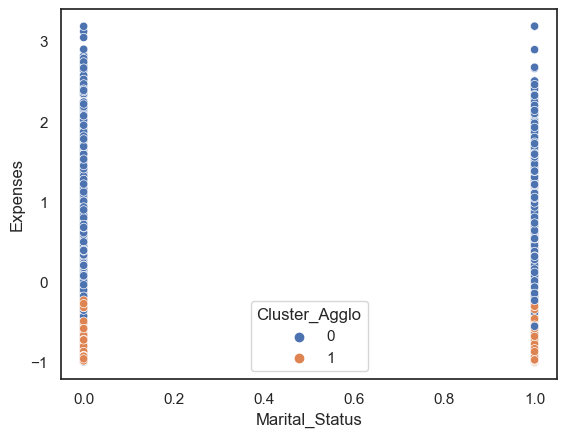

In [173]:
sns.scatterplot(x=X_2['Marital_Status'],y=X_2['Expenses'],hue=X_2['Cluster_Agglo']);

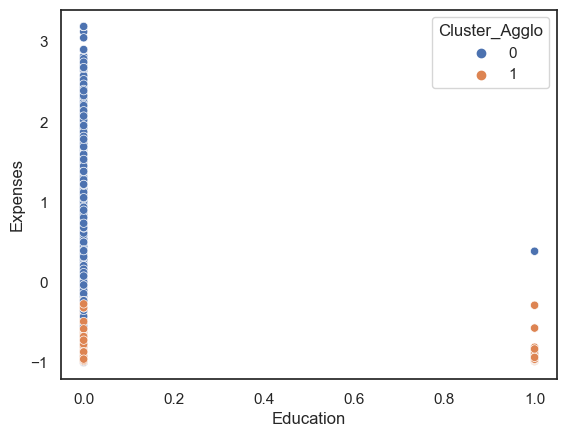

In [175]:
sns.scatterplot(x=X_2['Education'],y=X_2['Expenses'],hue=X_2['Cluster_Agglo']);

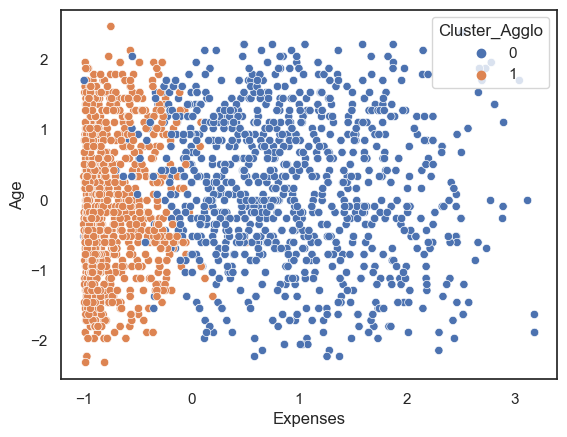

In [179]:
sns.scatterplot(y=X_2['Age'],x=X_2['Expenses'],hue=X_2['Cluster_Agglo']);

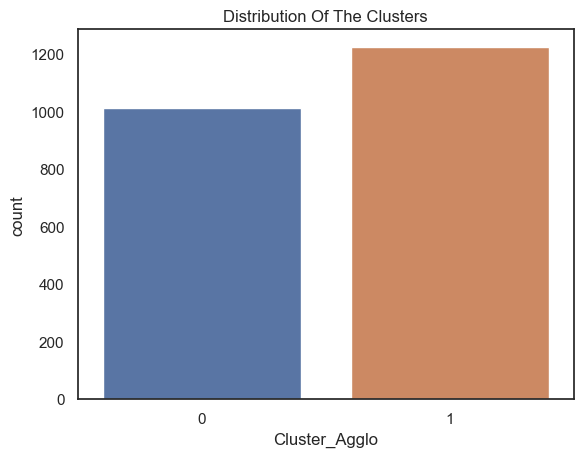

In [180]:
sns.countplot(x=X_2["Cluster_Agglo"])
plt.title("Distribution Of The Clusters")
plt.show()

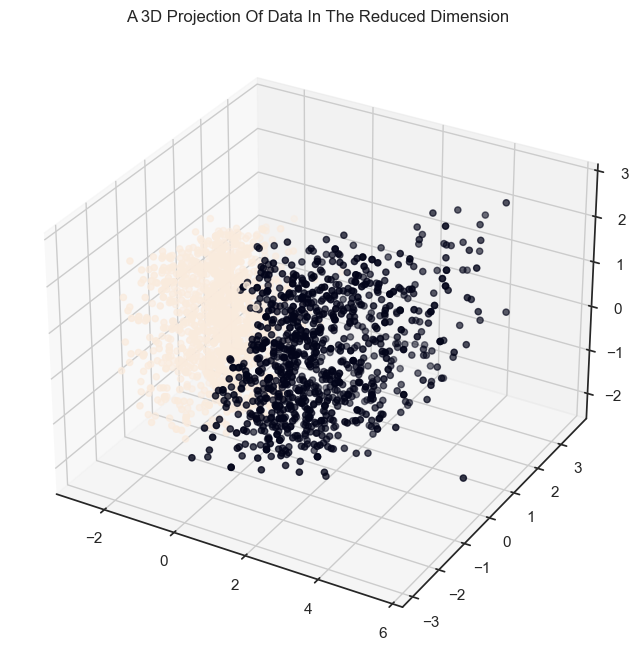

In [181]:
plt.figure(figsize=(10,8))
ax=plt.axes(projection='3d')
ax.scatter3D(x,y,z, c=PCA_ds["Clusters"], marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")

plt.show();

# Conclusions:


## Cluster 1:

People with less expenses

people who are married and parents of more than 3 kids

people with low income

people with undergraduate



## Cluster 0:
people with more expenses

people who are single or parents who have less than 3 kids

people with high income

people with postgraduate

Age is not the criteria but it is observed to some extent that people who are older fall in this group

So, the customers falling in cluster 0 likes to spend more...so the Firm's can target people falling in cluster 0 for the sale of their Products....

# Thanks you!!!!